# **Explorando el Tejido Urbano: Un Análisis Integral de Crímenes, Tendencias Temporales y su Relación con la Plataforma Uber en Ciudades a través de Machine Learning**


#INDICE
##1: Abstracto
##2: Motivacion
##3: Audiencia
##4: Preguntas
##5: Data Wrangling
##6: Storytelling Uber y la Criminalidad
##7: Metadata
##8: Analisis Exploratorio EDA
##9: Entrenamiento de Algoritmo Machine Learning
##10: Entramiento de Modelo Supervisado
##11: Comparacion de Modelos
##12: Feature Seleccion
##13: Conclusiones
##14:Insights & Recomendaciones.




Indice

#1 Abstracto:

El proyecto de análisis de datos se enfoca en investigar la relación entre los incidentes urbanos, particularmente los crímenes, y la presencia de la plataforma de transporte Uber. A través de este análisis, se busca comprender cómo la disponibilidad y el uso de Uber pueden influir en los patrones de criminalidad en diversas áreas urbanas. Este estudio se basa en la exploración de un conjunto de datos que incluye información detallada sobre diversos tipos de crímenes, así como datos relacionados con la actividad de Uber en diferentes ciudades. El análisis se realizará utilizando técnicas de análisis exploratorio de datos y modelos de machine learning para identificar patrones, tendencias y posibles correlaciones entre la presencia de Uber y la incidencia de crímenes en diferentes contextos urbanos.

#2 Motivación:

La motivación detrás de este proyecto radica en la importancia de comprender cómo la introducción y la operación de servicios de transporte compartido, como Uber, pueden afectar la seguridad urbana y los niveles de criminalidad. Esta comprensión es crucial para diversos actores, incluidas las autoridades gubernamentales encargadas de la seguridad pública, los sociólogos interesados en el comportamiento humano en entornos urbanos y la propia empresa Uber, que puede utilizar estos datos para mejorar sus políticas de seguridad y sus servicios.

#3 Audiencia:

La audiencia principal de este proyecto incluye a autoridades gubernamentales responsables de la seguridad pública en entornos urbanos, investigadores y académicos interesados en el estudio del crimen y la seguridad urbana, así como profesionales y ejecutivos de la industria del transporte compartido, como Uber. Además, este análisis puede ser de interés para el público en general, ya que proporcionará una visión más profunda sobre cómo la tecnología y los servicios de transporte pueden influir en la seguridad de las ciudades.

#4 Preguntas de Interes para el Analisis
Variación Temporal de Homicidios:

¿Existen patrones estacionales o tendencias a lo largo de los años en las tasas de homicidios?
¿Hay meses o años específicos con un aumento significativo?
Comparación de Ciudades:

¿Las tasas de homicidios varían significativamente entre ciudades de diferentes categorías ('city_cat')?
¿Existen disparidades notables que podrían estar relacionadas con la categorización de la ciudad?
Distribución y Cambios en Tipos de Crímenes:

¿Cómo ha evolucionado la distribución de diferentes tipos de crímenes a lo largo del tiempo y entre ciudades?
¿Existen tipos de crímenes que muestran cambios notables?
Correlación con Edad y Criminalidad:

¿Existe alguna correlación significativa entre la tasa de homicidios y las variables que indican la tasa de criminalidad en grupos de edad específicos ('lag_com_45_to_60' y 'lag_com_60_plus')?
Relación entre Contexto Urbano y Crímenes:

¿Cómo se relaciona la categoría de la ciudad ('city_cat') con diferentes tipos de crímenes?
¿Hay patrones que indiquen cómo la urbanización puede influir en la seguridad ciudadana?

In [ ]:
#Lectura de datos e inicialización de librerías
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree, DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.feature_selection import SelectKBest, f_regression

from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Ruta del archivo CSV en Google Drive
ruta_csv = 'https://drive.google.com/uc?id=1zG74gffpWjrBLoXC8u5ZZ3euEKbqRV5g'

# Cargar el archivo CSV
df = pd.read_csv(ruta_csv)

# Mostrar las primeras filas del DataFrame
print(df.head())

   Unnamed: 0  inc_month identifier  inc_year  \
0           1          1  AKRON, OH         0   
1           2          2  AKRON, OH         0   
2           3          3  AKRON, OH         0   
3           4          4  AKRON, OH         0   
4           5          5  AKRON, OH         0   

                              city_cat  homicide  kidnapping  sex_forcible  \
0  Group II (Cities 100,000 - 249,999)         0          12            26   
1  Group II (Cities 100,000 - 249,999)         0           6            16   
2  Group II (Cities 100,000 - 249,999)         3          11            22   
3  Group II (Cities 100,000 - 249,999)         2          10            24   
4  Group II (Cities 100,000 - 249,999)         3           7            25   

   robbery  assault  ...  lag_work_out_state  lag_commute_time  lag_com_15  \
0       46      444  ...                 NaN               NaN         NaN   
1       45      452  ...                 NaN               NaN         NaN   
2 

#DATA WRANGLING

###Identificar y Manejar Valores Faltantes

In [ ]:
# Verificar valores nulos
print(df.isnull().sum())


Unnamed: 0            0
inc_month             0
identifier            0
inc_year              0
city_cat              0
                   ... 
lag_com_30          216
lag_com_35          216
lag_com_40          216
lag_com_45_to_60    216
lag_com_60_plus     216
Length: 147, dtype: int64


In [ ]:
# Verificar valores nulos
print(df.isnull().sum())

Unnamed: 0            0
inc_month             0
identifier            0
inc_year              0
city_cat              0
                   ... 
lag_com_30          216
lag_com_35          216
lag_com_40          216
lag_com_45_to_60    216
lag_com_60_plus     216
Length: 147, dtype: int64


In [ ]:
# Imputar con la media.
df['lag_com_30'] = df['lag_com_30'].fillna(df['lag_com_30'].mean())

In [ ]:
# Imputar con la moda.
df['city_cat'] = df['city_cat'].fillna(df['city_cat'].mode()[0])


Imputar valores faltantes Variables numéricas: Para las variables numéricas, podemos reemplazar los valores faltantes con la media de la columna correspondiente.

In [ ]:
# Lista de columnas numéricas
num_cols = ['homicide', 'kidnapping', 'sex_forcible', 'robbery', 'assault', 'arson', 'extortion_blackmail', 'burglary_bne', 'lag_com_45_to_60', 'lag_com_60_plus']

# Imputar con la media
for col in num_cols:
    df[col] = df[col].fillna(df[col].mean())

Variables categóricas: Para las variables categóricas, optamos por imputar los valores faltantes con la moda (el valor más frecuente) o una etiqueta específica si consideras que hay alguna que tenga sentido en el contexto de tus datos.

In [ ]:
# Lista de columnas categóricas
cat_cols = ['city_cat']

# Imputar con la moda
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

    # Imputar con una etiqueta específica
for col in cat_cols:
    df[col] = df[col].fillna('Desconocido')

###Corregir el formato de los datos

In [ ]:
# Estas columnas no fueron correctamente identificadas como numéricas debido a algún problema en los datos (por ejemplo, tipos de datos mixtos).
print(df[['lag_com_35', 'lag_com_40']].dtypes)

lag_com_35    float64
lag_com_40    float64
dtype: object


In [ ]:
#Las columnas no son de tipo numérico, las convierto antes de imputar con la media.
df['lag_com_35'] = pd.to_numeric(df['lag_com_35'], errors='coerce')
df['lag_com_40'] = pd.to_numeric(df['lag_com_40'], errors='coerce')


In [ ]:
#Una vez convertido las columnas a tipos numéricos, procedemos a imputar los valores faltantes con la media.
df['lag_com_40'] = df['lag_com_40'].fillna(df['lag_com_40'].mean())

In [ ]:
#Verificamos los datos.
print(df.isnull().sum())

Unnamed: 0            0
inc_month             0
identifier            0
inc_year              0
city_cat              0
                   ... 
lag_com_30            0
lag_com_35          216
lag_com_40            0
lag_com_45_to_60      0
lag_com_60_plus       0
Length: 147, dtype: int64


Utilizamos K-means para identificar patrones y estructuras subyacentes en nuestros datos, lo que puede ayudar a comprender mejor la relación entre la actividad de Uber y la criminalidad en diferentes áreas geográficas.

In [ ]:
from sklearn.preprocessing import StandardScaler

# Seleccionamo las columnas numéricas para estandarizar
columns_to_standardize = ['homicide', 'kidnapping', 'sex_forcible', 'robbery', 'assault', 'arson', 'extortion_blackmail', 'burglary_bne']

# Crear el objeto StandardScaler
scaler = StandardScaler()

# Ajustar y transformar los datos
df[columns_to_standardize] = scaler.fit_transform(df[columns_to_standardize])

# Mostrar las primeras filas para ver el resultado
print(df.head())

   Unnamed: 0  inc_month identifier  inc_year  \
0           1          1  AKRON, OH         0   
1           2          2  AKRON, OH         0   
2           3          3  AKRON, OH         0   
3           4          4  AKRON, OH         0   
4           5          5  AKRON, OH         0   

                              city_cat  homicide  kidnapping  sex_forcible  \
0  Group II (Cities 100,000 - 249,999) -0.769893    0.107610     -0.407621   
1  Group II (Cities 100,000 - 249,999) -0.769893   -0.358820     -0.739019   
2  Group II (Cities 100,000 - 249,999) -0.294034    0.029872     -0.540180   
3  Group II (Cities 100,000 - 249,999) -0.452654   -0.047867     -0.473900   
4  Group II (Cities 100,000 - 249,999) -0.294034   -0.281082     -0.440760   

    robbery   assault  ...  lag_work_out_state  lag_commute_time  lag_com_15  \
0 -0.675843 -0.568532  ...                 NaN               NaN         NaN   
1 -0.684466 -0.556912  ...                 NaN               NaN         NaN

###Normalización de datos (centrado/escalado)

In [ ]:
#Calcular la suma total de incidentes por tipo de crimen
crimes_sum = df[['homicide', 'kidnapping', 'sex_forcible', 'robbery', 'assault', 'arson', 'extortion_blackmail', 'burglary_bne']].sum()
print(crimes_sum)

homicide               7.105427e-15
kidnapping             0.000000e+00
sex_forcible           9.947598e-14
robbery               -5.684342e-14
assault                7.105427e-15
arson                 -4.263256e-14
extortion_blackmail   -5.684342e-14
burglary_bne          -4.263256e-14
dtype: float64


In [ ]:
#Determinar el crimen con la mayor suma total
highest_crime = crimes_sum.idxmax()
print(f"El crimen con la tasa de probabilidades más alta es: {highest_crime}")

El crimen con la tasa de probabilidades más alta es: sex_forcible


###Columnas a Normalizar

In [ ]:
columns_to_normalize = ['homicide', 'kidnapping', 'sex_forcible', 'robbery', 'assault', 'arson', 'extortion_blackmail', 'burglary_bne']

Aplicar la Normalizacion

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Instancia del MinMaxScaler
scaler = MinMaxScaler()

# Seleccionamos las columnas de crimen y aplica la transformación
df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])

# Verificamos la normalización
print(df[columns_to_normalize].head())

   homicide  kidnapping  sex_forcible   robbery   assault     arson  \
0  0.000000    0.160000      0.165605  0.074074  0.126979  0.068376   
1  0.000000    0.080000      0.101911  0.072391  0.129512  0.025641   
2  0.069767    0.146667      0.140127  0.084175  0.177644  0.042735   
3  0.046512    0.133333      0.152866  0.079125  0.184927  0.094017   
4  0.069767    0.093333      0.159236  0.080808  0.194110  0.068376   

   extortion_blackmail  burglary_bne  
0             0.058824      0.133455  
1             0.058824      0.082267  
2             0.000000      0.154174  
3             0.000000      0.182815  
4             0.000000      0.203534  


In [ ]:
# Verificar los valores mínimos y máximos para asegurarse de que estén entre 0 y 1
print(df[columns_to_normalize].min())
print(df[columns_to_normalize].max())

homicide               0.0
kidnapping             0.0
sex_forcible           0.0
robbery                0.0
assault                0.0
arson                  0.0
extortion_blackmail    0.0
burglary_bne           0.0
dtype: float64
homicide               1.0
kidnapping             1.0
sex_forcible           1.0
robbery                1.0
assault                1.0
arson                  1.0
extortion_blackmail    1.0
burglary_bne           1.0
dtype: float64


###Agrupamiento

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


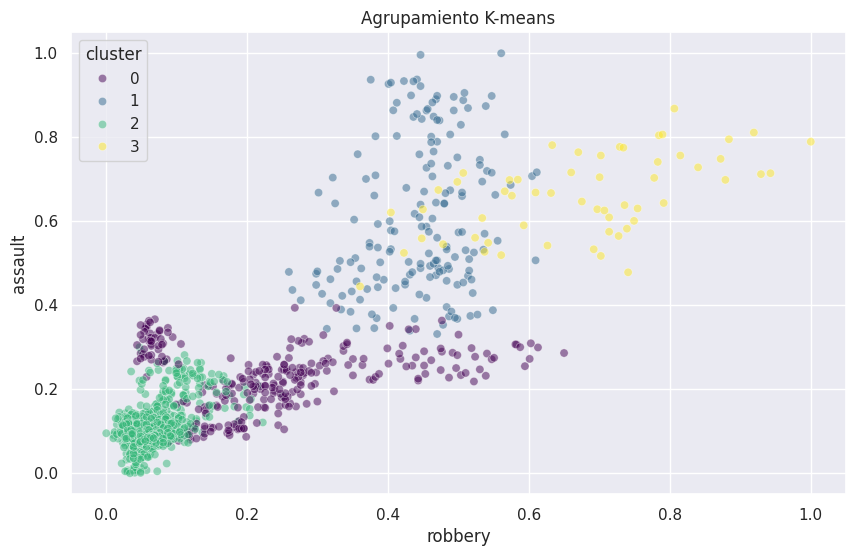

In [ ]:
from sklearn.cluster import KMeans
import seaborn as sns; sns.set()  # Para estilizar los gráficos


# Seleccionar las columnas relevantes para el agrupamiento
X = df[['homicide', 'kidnapping', 'sex_forcible', 'robbery', 'assault', 'arson', 'extortion_blackmail', 'burglary_bne']]

# elegimos 4 clústeres.
kmeans = KMeans(n_clusters=4)

# Ajustar el modelo
kmeans.fit(X)

# Etiquetas de los clústeres
labels = kmeans.labels_

# Añadir las etiquetas de los clústeres al DataFrame
df['cluster'] = labels

# Visualizar los resultados
# Para la visualización, elegiremos solo dos dimensiones. Podrías hacer un análisis de componentes principales (PCA) para reducir dimensiones si deseas visualizar en 2D o 3D.
plt.figure(figsize=(10, 6))
sns.scatterplot(x='robbery', y='assault', hue='cluster', data=df, palette='viridis', alpha=0.5)
plt.title('Agrupamiento K-means')
plt.show()

Este gráfico muestra que existe una relación positiva entre la tasa de criminalidad en el rango de 45 a 60 años y el número de homicidios. Esto significa que a medida que aumenta la tasa de criminalidad en el rango de 45 a 60 años, también aumenta el número de homicidios. Sin embargo, es importante tener en cuenta que la correlación no implica causalidad y que hay otros factores que pueden influir en el número de homicidios.

###Variable Indicadora

In [ ]:
# Verificamos las variables y sus tipos
print(df.dtypes)

Unnamed: 0            int64
inc_month             int64
identifier           object
inc_year              int64
city_cat             object
                     ...   
lag_com_35          float64
lag_com_40          float64
lag_com_45_to_60    float64
lag_com_60_plus     float64
cluster               int32
Length: 148, dtype: object


In [ ]:
#Las variables identifier y city_cat son del tipo object, por lo que son las variables categóricas.
#Utilizamos el método get_dummies para crear variables indicadoras para cada categoría en las variables categóricas.

dummy_identifier = pd.get_dummies(df["identifier"])
dummy_city_cat = pd.get_dummies(df["city_cat"])

In [ ]:
#Cambiamos los nombres de las columnas resultantes para mayor claridad.

dummy_identifier.rename(columns={'AKRON, OH':'akron', 'example_value':'example'}, inplace=True)
dummy_city_cat.rename(columns={'Group II (Cities 100,000 - 249,999)':'group_2', 'example_value':'example'}, inplace=True)

In [ ]:
#Agregamos las variables indicadoras al DataFrame original.
df = pd.concat([df, dummy_identifier, dummy_city_cat], axis=1)

In [ ]:
#Eliminamos las columnas originales
df.drop(["identifier", "city_cat"], axis=1, inplace=True)

In [ ]:
#Para validar si las variables indicadoras se crearon correctamente, segui estos pasos:
#Verificar las primeras filas del DataFrame.
print(df.head())

   Unnamed: 0  inc_month  inc_year  homicide  kidnapping  sex_forcible  \
0           1          1         0  0.000000    0.160000      0.165605   
1           2          2         0  0.000000    0.080000      0.101911   
2           3          3         0  0.069767    0.146667      0.140127   
3           4          4         0  0.046512    0.133333      0.152866   
4           5          5         0  0.069767    0.093333      0.159236   

    robbery   assault     arson  extortion_blackmail  ...  KANSAS CITY, MO  \
0  0.074074  0.126979  0.068376             0.058824  ...            False   
1  0.072391  0.129512  0.025641             0.058824  ...            False   
2  0.084175  0.177644  0.042735             0.000000  ...            False   
3  0.079125  0.184927  0.094017             0.000000  ...            False   
4  0.080808  0.194110  0.068376             0.000000  ...            False   

   KNOXVILLE, TN  LITTLE ROCK, AR  MEMPHIS, TN  MILWAUKEE, WI  RICHMOND, VA  \
0      

In [ ]:
# Verificamos las columnas del DataFrame.
print(df.columns)

Index(['Unnamed: 0', 'inc_month', 'inc_year', 'homicide', 'kidnapping',
       'sex_forcible', 'robbery', 'assault', 'arson', 'extortion_blackmail',
       ...
       'KANSAS CITY, MO', 'KNOXVILLE, TN', 'LITTLE ROCK, AR', 'MEMPHIS, TN',
       'MILWAUKEE, WI', 'RICHMOND, VA', 'TACOMA, WA', 'WICHITA, KS',
       'Group I (Cities 250,000 and over)', 'group_2'],
      dtype='object', length=166)


In [ ]:
#Comprobar los valores únicos.
# Verificar si las variables indicadoras de las ciudades se crearon correctamente
for column in df.columns:
    if column.endswith('_city'):
        print(column)

In [ ]:
print(df[['KANSAS CITY, MO', 'KNOXVILLE, TN', 'LITTLE ROCK, AR', 'MEMPHIS, TN', 'MILWAUKEE, WI', 'RICHMOND, VA', 'TACOMA, WA', 'WICHITA, KS', 'Group I (Cities 250,000 and over)', 'group_2']].head())


   KANSAS CITY, MO  KNOXVILLE, TN  LITTLE ROCK, AR  MEMPHIS, TN  \
0            False          False            False        False   
1            False          False            False        False   
2            False          False            False        False   
3            False          False            False        False   
4            False          False            False        False   

   MILWAUKEE, WI  RICHMOND, VA  TACOMA, WA  WICHITA, KS  \
0          False         False       False        False   
1          False         False       False        False   
2          False         False       False        False   
3          False         False       False        False   
4          False         False       False        False   

   Group I (Cities 250,000 and over)  group_2  
0                              False     True  
1                              False     True  
2                              False     True  
3                              False     True  
4 

##Tratamiento de valores nulos

In [ ]:
# Imputar valores nulos con la media de cada columna
df[['lag_com_45_to_60', 'lag_com_60_plus']] = df[['lag_com_45_to_60', 'lag_com_60_plus']].fillna(df[['lag_com_45_to_60', 'lag_com_60_plus']].mean())

# Verificar nuevamente los valores nulos
print(df.isnull().sum())

Unnamed: 0                           0
inc_month                            0
inc_year                             0
homicide                             0
kidnapping                           0
                                    ..
RICHMOND, VA                         0
TACOMA, WA                           0
WICHITA, KS                          0
Group I (Cities 250,000 and over)    0
group_2                              0
Length: 166, dtype: int64


#6 Storytelling Uber y la Criminalidad.

Explorar la criminalidad urbana es sumergirse en un relato donde las cifras revelan más que simples estadísticas: muestran cómo la sociedad y su estructura influyen en los patrones de crimen. Este análisis busca entender la evolución de los crímenes a lo largo del tiempo y entre ciudades, destacando aquellos tipos de crímenes con cambios notorios, y cómo factores como la edad y la urbanización impactan en la seguridad ciudadana. Con este enfoque, aspiramos a descifrar no solo los patrones detrás de la criminalidad, sino también a contribuir en la elaboración de estrategias efectivas para su prevención y reducción.

In [ ]:
#Lectura de datos
print(df.head())

   Unnamed: 0  inc_month  inc_year  homicide  kidnapping  sex_forcible  \
0           1          1         0  0.000000    0.160000      0.165605   
1           2          2         0  0.000000    0.080000      0.101911   
2           3          3         0  0.069767    0.146667      0.140127   
3           4          4         0  0.046512    0.133333      0.152866   
4           5          5         0  0.069767    0.093333      0.159236   

    robbery   assault     arson  extortion_blackmail  ...  KANSAS CITY, MO  \
0  0.074074  0.126979  0.068376             0.058824  ...            False   
1  0.072391  0.129512  0.025641             0.058824  ...            False   
2  0.084175  0.177644  0.042735             0.000000  ...            False   
3  0.079125  0.184927  0.094017             0.000000  ...            False   
4  0.080808  0.194110  0.068376             0.000000  ...            False   

   KNOXVILLE, TN  LITTLE ROCK, AR  MEMPHIS, TN  MILWAUKEE, WI  RICHMOND, VA  \
0      

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1080 entries, 0 to 1079
Columns: 166 entries, Unnamed: 0 to group_2
dtypes: bool(21), float64(100), int32(1), int64(39), object(5)
memory usage: 1.2+ MB
None


In [ ]:
print(df.describe())

       Unnamed: 0    inc_month     inc_year     homicide   kidnapping  \
count  1080.00000  1080.000000  1080.000000  1080.000000  1080.000000   
mean    540.50000     6.500000     2.000000     0.112877     0.141543   
std     311.91345     3.453652     1.414869     0.146682     0.171595   
min       1.00000     1.000000     0.000000     0.000000     0.000000   
25%     270.75000     3.750000     1.000000     0.023256     0.040000   
50%     540.50000     6.500000     2.000000     0.069767     0.080000   
75%     810.25000     9.250000     3.000000     0.139535     0.173333   
max    1080.00000    12.000000     4.000000     1.000000     1.000000   

       sex_forcible      robbery      assault        arson  \
count   1080.000000  1080.000000  1080.000000  1080.000000   
mean       0.243949     0.206028     0.250921     0.107091   
std        0.192287     0.195334     0.218104     0.143185   
min        0.000000     0.000000     0.000000     0.000000   
25%        0.082803     0.060606

In [ ]:
print(df.columns)

Index(['Unnamed: 0', 'inc_month', 'inc_year', 'homicide', 'kidnapping',
       'sex_forcible', 'robbery', 'assault', 'arson', 'extortion_blackmail',
       ...
       'KANSAS CITY, MO', 'KNOXVILLE, TN', 'LITTLE ROCK, AR', 'MEMPHIS, TN',
       'MILWAUKEE, WI', 'RICHMOND, VA', 'TACOMA, WA', 'WICHITA, KS',
       'Group I (Cities 250,000 and over)', 'group_2'],
      dtype='object', length=166)


###Analizar si existen diferencias significativas en las tasas de homicidios entre ciudades y si estas disparidades pueden estar relacionadas con la categorización de la ciudad

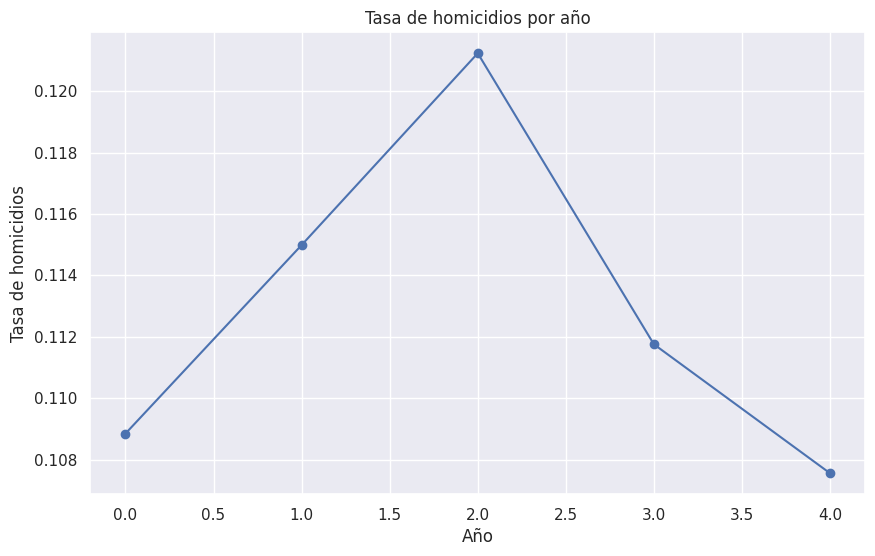

<Figure size 1200x600 with 0 Axes>

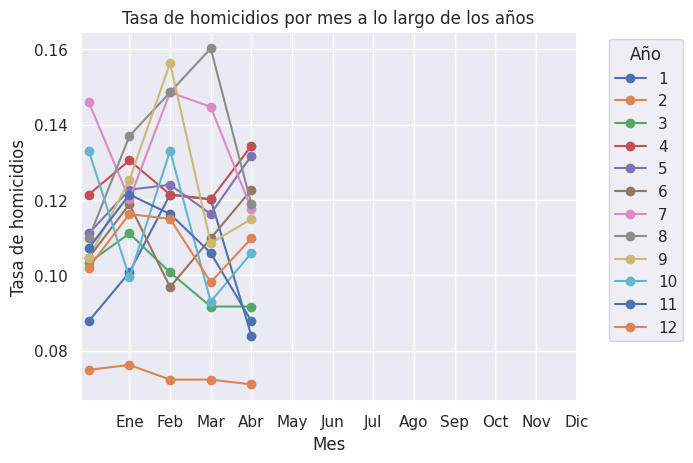

In [ ]:
# Calcular la tasa de homicidios por año
homicide_rate_yearly = df.groupby('inc_year')['homicide'].mean()

# Graficar la tasa de homicidios a lo largo de los años
plt.figure(figsize=(10, 6))
plt.plot(homicide_rate_yearly.index, homicide_rate_yearly.values, marker='o', linestyle='-')
plt.title('Tasa de homicidios por año')
plt.xlabel('Año')
plt.ylabel('Tasa de homicidios')
plt.grid(True)
plt.show()

# Calcular la tasa de homicidios por mes para cada año
homicide_rate_monthly = df.groupby(['inc_year', 'inc_month'])['homicide'].mean().unstack()

# Graficar la tasa de homicidios por mes para visualizar patrones estacionales
plt.figure(figsize=(12, 6))
homicide_rate_monthly.plot(marker='o', linestyle='-')
plt.title('Tasa de homicidios por mes a lo largo de los años')
plt.xlabel('Mes')
plt.ylabel('Tasa de homicidios')
plt.legend(title='Año', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.xticks(np.arange(1, 13), ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'])
plt.show()


El primer gráfico muestra la tendencia general de la tasa de homicidios a lo largo de los años. Permite observar si la tasa ha aumentado, disminuido o se ha mantenido estable. El segundo gráfico permite observar la estacionalidad en la tasa de homicidios. Es posible que haya meses con mayor incidencia de homicidios que otros. Al comparar las líneas de diferentes años en el segundo gráfico, se pueden identificar posibles cambios en los patrones estacionales a lo largo del tiempo.

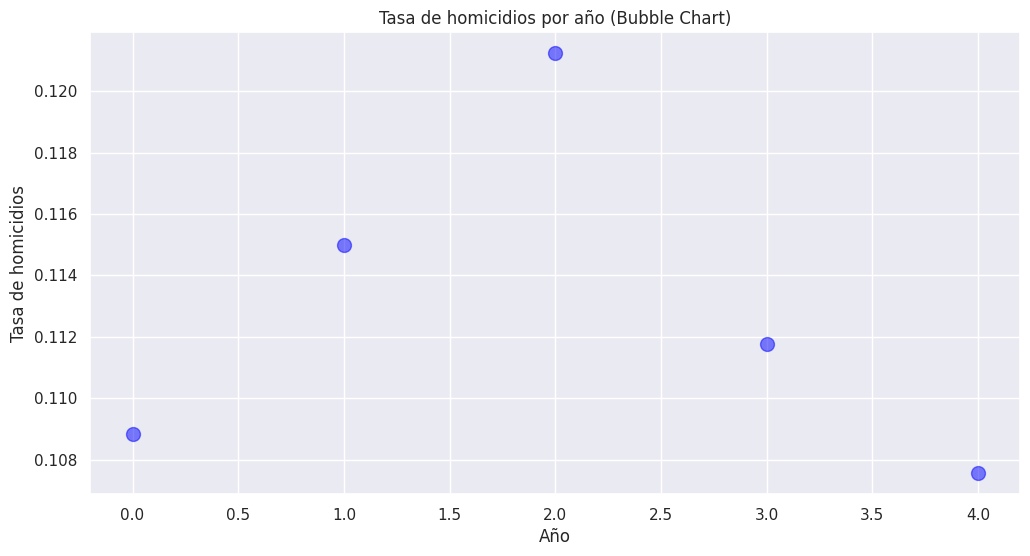

In [ ]:
# Graficar la tasa de homicidios por año con un gráfico de burbujas
plt.figure(figsize=(12, 6))
plt.scatter(homicide_rate_yearly.index, homicide_rate_yearly.values, s=100, c='blue', alpha=0.5)
plt.title('Tasa de homicidios por año (Bubble Chart)')
plt.xlabel('Año')
plt.ylabel('Tasa de homicidios')
plt.grid(True)
plt.show()

El gráfico de burbujas permite visualizar la tasa de homicidios por año de una forma más intuitiva. El tamaño de las burbujas refleja la magnitud de la tasa de homicidios en cada año. Se puede observar una mayor concentración de puntos en la zona inferior del gráfico, lo que indica una tendencia general a la baja en la tasa de homicidios.

Cómo ha evolucionado la distribución de diferentes tipos de crímenes a lo largo del tiempo y entre ciudades? y ¿Existen tipos de crímenes que muestran cambios notables?

<ipython-input-36-c081a0767b24>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=homicide_rates_by_city.values, y=homicide_rates_by_city.index, palette='viridis')


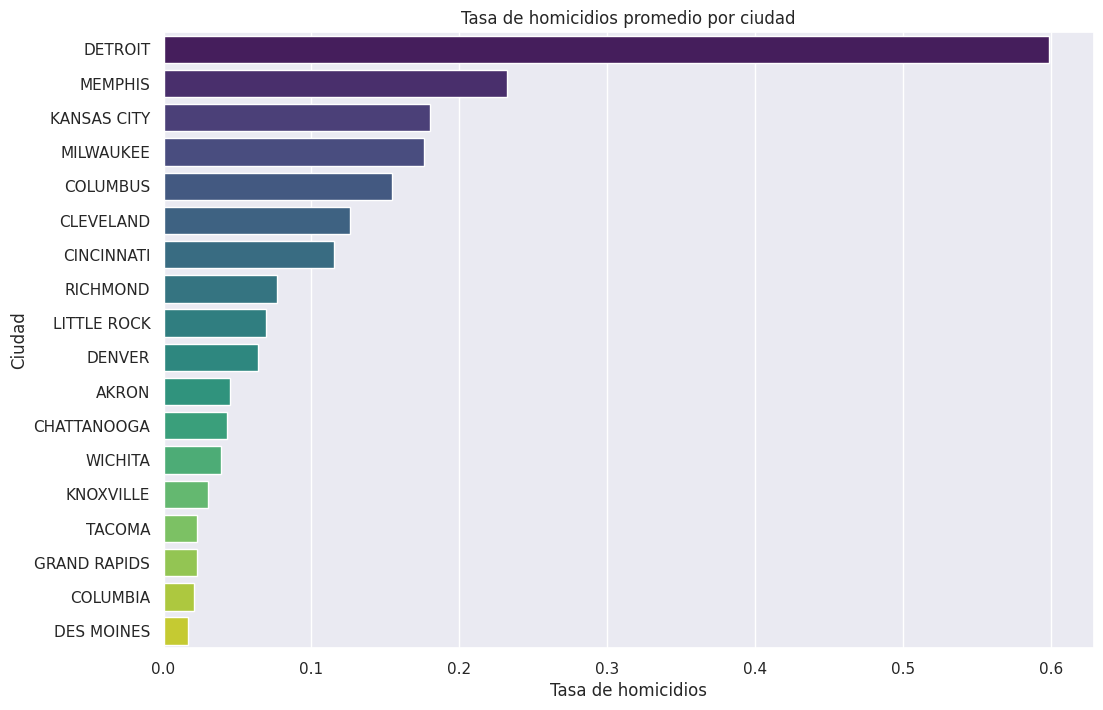

<ipython-input-36-c081a0767b24>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=homicide_rates_by_group.index, y=homicide_rates_by_group.values, palette='magma')


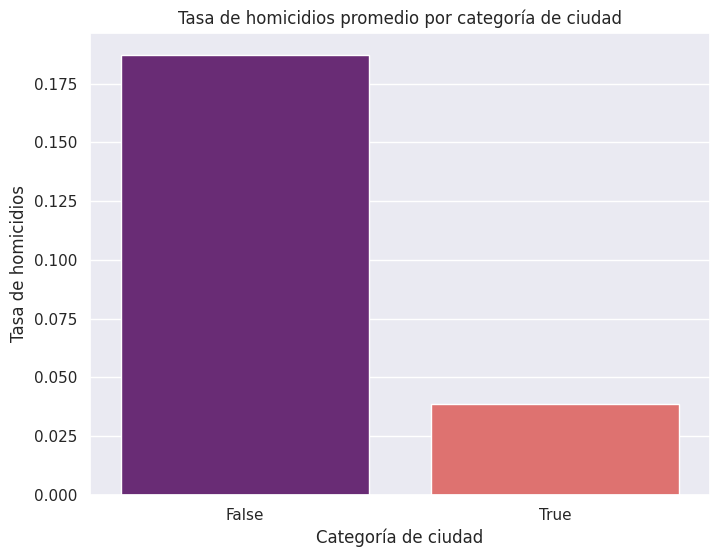

In [ ]:
# Calcular la tasa de homicidios promedio por ciudad
homicide_rates_by_city = df.groupby('city_name')['homicide'].mean().sort_values(ascending=False)

# Visualizar las tasas de homicidios por ciudad
plt.figure(figsize=(12, 8))
sns.barplot(x=homicide_rates_by_city.values, y=homicide_rates_by_city.index, palette='viridis')
plt.title('Tasa de homicidios promedio por ciudad')
plt.xlabel('Tasa de homicidios')
plt.ylabel('Ciudad')
plt.show()

# Se comparan las tasas de homicidios entre grupos
homicide_rates_by_group = df.groupby('group_2')['homicide'].mean()

# Visualizar las tasas de homicidios por categoría de ciudad
plt.figure(figsize=(8, 6))
sns.barplot(x=homicide_rates_by_group.index, y=homicide_rates_by_group.values, palette='magma')
plt.title('Tasa de homicidios promedio por categoría de ciudad')
plt.xlabel('Categoría de ciudad')
plt.ylabel('Tasa de homicidios')
plt.show()

El gráfico de barras horizontales permite comparar de forma rápida y visual las tasas de homicidios entre ciudades. Las ciudades con las barras más altas son las que tienen las tasas de homicidios más preocupantes. Si se ha realizado un análisis por categoría de ciudad, el gráfico de barras permite comparar las tasas de homicidios entre diferentes categorías. Es importante tener en cuenta el contexto de cada ciudad (tamaño, población, características socioeconómicas) al interpretar las tasas de homicidios.

In [ ]:
# Import the plotly.express module
import plotly.express as px

# Crear un DataFrame con la tasa de homicidios promedio por ciudad y categoría de ciudad
homicide_rates_by_group_df = pd.DataFrame({'city_name': homicide_rates_by_city.index, 'homicide_rate': homicide_rates_by_city.values})

# Visualizar la tasa de homicidios promedio por ciudad y categoría de ciudad en un gráfico de burbujas
fig = px.scatter(homicide_rates_by_group_df, x='homicide_rate', y='city_name', size='homicide_rate',
                 color='homicide_rate', hover_name='city_name',
                 title='Tasa de homicidios promedio por ciudad',
                 labels={'homicide_rate': 'Tasa de homicidios', 'city_name': 'Ciudad'},
                 color_continuous_scale='viridis')
fig.update_layout(xaxis=dict(title='Tasa de homicidios'), yaxis=dict(title='Ciudad'))
fig.show()

# Visualizar la tasa de homicidios promedio por categoría de ciudad en un gráfico de burbujas
homicide_rates_by_group_df['group'] = df.groupby('city_name')['group_2'].first()
fig = px.scatter(homicide_rates_by_group_df, x='homicide_rate', y='group', size='homicide_rate',
                 color='homicide_rate', hover_name='group',
                 title='Tasa de homicidios promedio por categoría de ciudad',
                 labels={'homicide_rate': 'Tasa de homicidios', 'group': 'Categoría de ciudad'},
                 color_continuous_scale='magma')
fig.update_layout(xaxis=dict(title='Tasa de homicidios'), yaxis=dict(title='Categoría de ciudad'))
fig.show()

El gráfico de burbujas permite visualizar la relación entre la tasa de homicidios, la ciudad y la categoría de ciudad. Las ciudades con las burbujas más grandes son las que tienen las tasas de homicidios más preocupantes. Se pueden observar diferencias en las tasas de homicidios entre las diferentes categorías de ciudades.

###Existe alguna correlación significativa entre la tasa de homicidios y las variables que indican la tasa de criminalidad en grupos de edad específicos ('lag_com_45_to_60' y 'lag_com_60_plus')?

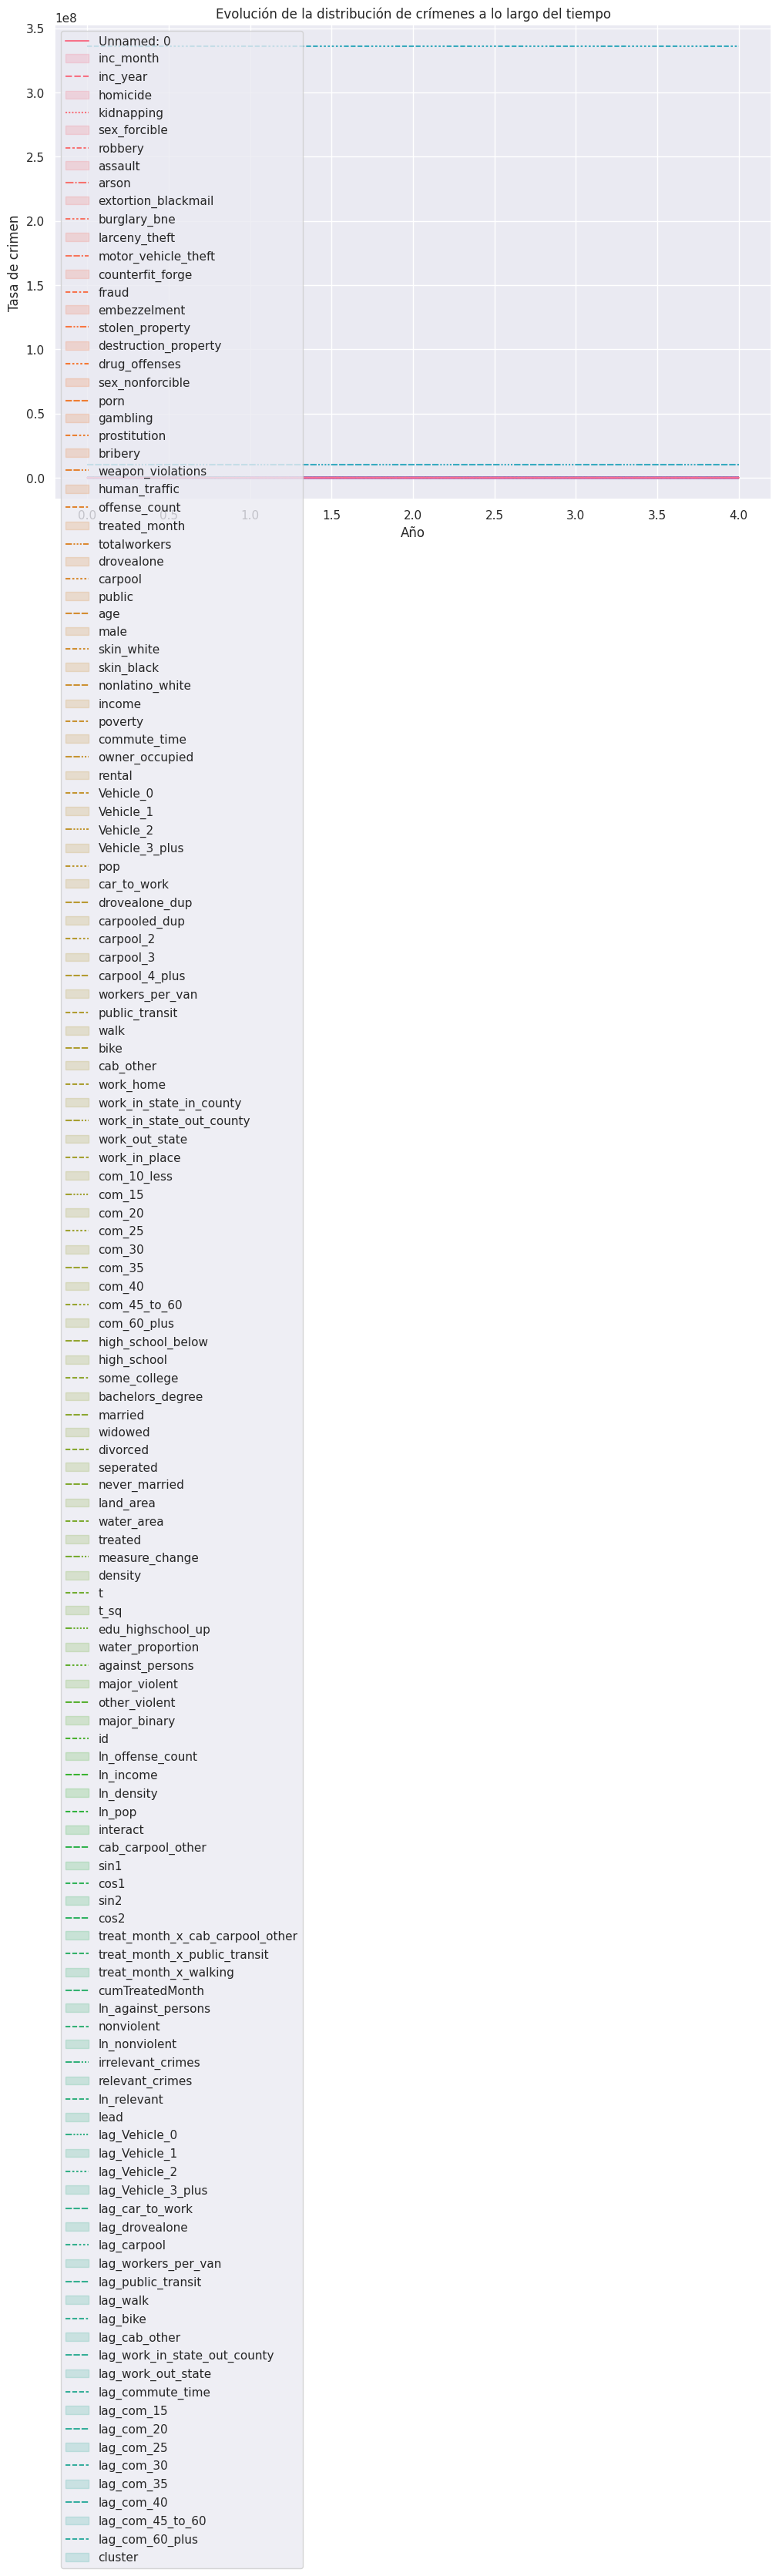

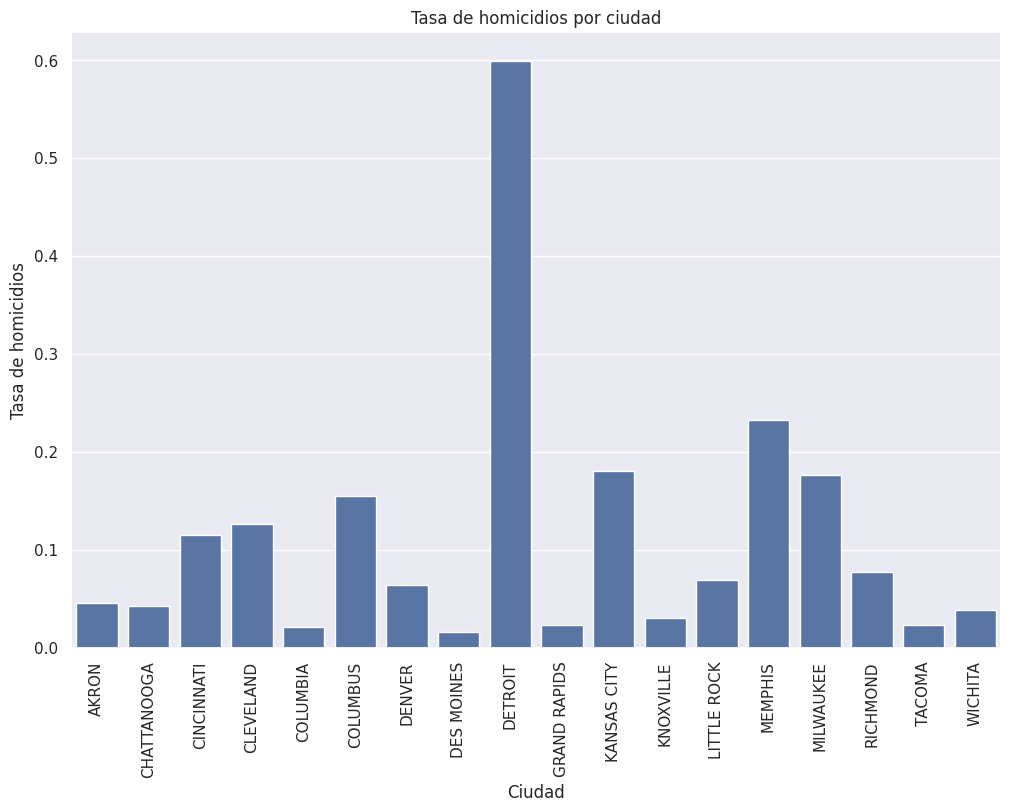

In [ ]:
# Filtrar columnas numéricas
numeric_columns = df.select_dtypes(include=['number']).columns

# Agrupar por año y calcular la media de cada tipo de crimen
crime_distribution_by_year = df.groupby('inc_year')[numeric_columns].mean()

# Visualizar la evolución de diferentes tipos de crímenes a lo largo del tiempo
plt.figure(figsize=(12, 8))
sns.lineplot(data=crime_distribution_by_year)
plt.title('Evolución de la distribución de crímenes a lo largo del tiempo')
plt.xlabel('Año')
plt.ylabel('Tasa de crimen')
plt.legend(crime_distribution_by_year.columns, loc='upper left')
plt.show()

# Análisis de la distribución de crímenes entre ciudades
# Agrupar por ciudad y calcular la media de cada tipo de crimen
crime_distribution_by_city = df.groupby('city_name')[numeric_columns].mean()

# Visualizar la distribución de diferentes tipos de crímenes entre ciudades
plt.figure(figsize=(12, 8))
sns.barplot(data=crime_distribution_by_city, x=crime_distribution_by_city.index, y='homicide')
plt.title('Tasa de homicidios por ciudad')
plt.xlabel('Ciudad')
plt.ylabel('Tasa de homicidios')
plt.xticks(rotation=90)
plt.show()


Análisis temporal: El gráfico de líneas permite observar la evolución de la tasa de cada tipo de crimen a lo largo del tiempo. Se pueden identificar tendencias como aumentos, disminuciones o cambios en la estacionalidad de los diferentes tipos de crímenes.

Análisis espacial: El gráfico de barras permite comparar la tasa de crimen entre diferentes ciudades. Se pueden identificar las ciudades con las tasas de crimen más altas y las que tienen mayor incidencia de un tipo de crimen específico.

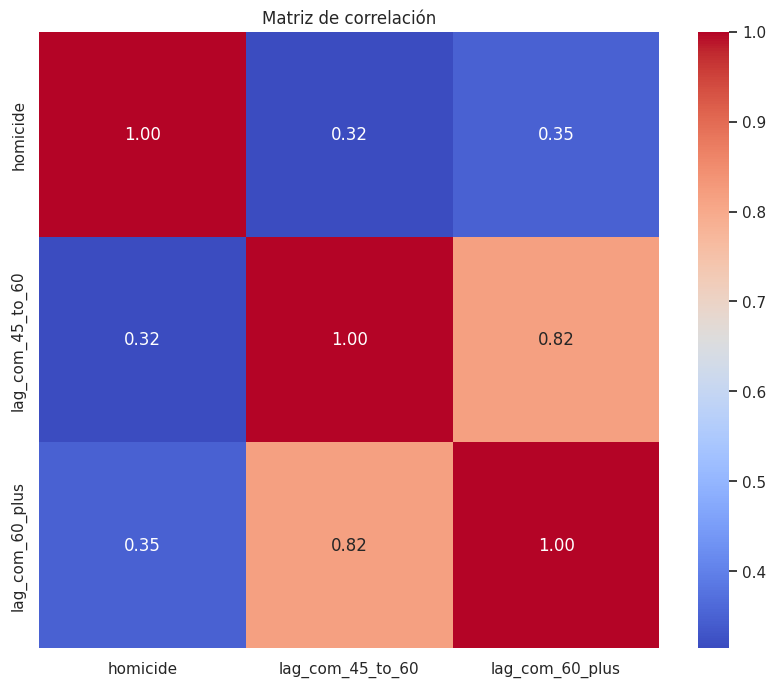

In [ ]:
# Seleccionar las variables relevantes
data = df[['homicide', 'lag_com_45_to_60', 'lag_com_60_plus']]

# Calcular la matriz de correlación
correlation_matrix = data.corr()

# Visualizar la matriz de correlación usando un mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de correlación')
plt.show()

El análisis de correlación es una herramienta útil para identificar posibles relaciones entre variables. Es importante realizar un análisis más profundo para confirmar las relaciones observadas y determinar su significancia estadística. Se pueden utilizar otras técnicas estadísticas, como modelos de regresión, para analizar la relación entre las variables de forma más precisa.

In [ ]:
# Calcular el coeficiente de correlación de Pearson
correlation_homicide_45_60 = df['homicide'].corr(df['lag_com_45_to_60'])
correlation_homicide_60_plus = df['homicide'].corr(df['lag_com_60_plus'])

print("Correlación entre homicidios y lag_com_45_to_60:", correlation_homicide_45_60)
print("Correlación entre homicidios y lag_com_60_plus:", correlation_homicide_60_plus)


Correlación entre homicidios y lag_com_45_to_60: 0.31523822825225895
Correlación entre homicidios y lag_com_60_plus: 0.34894040957508


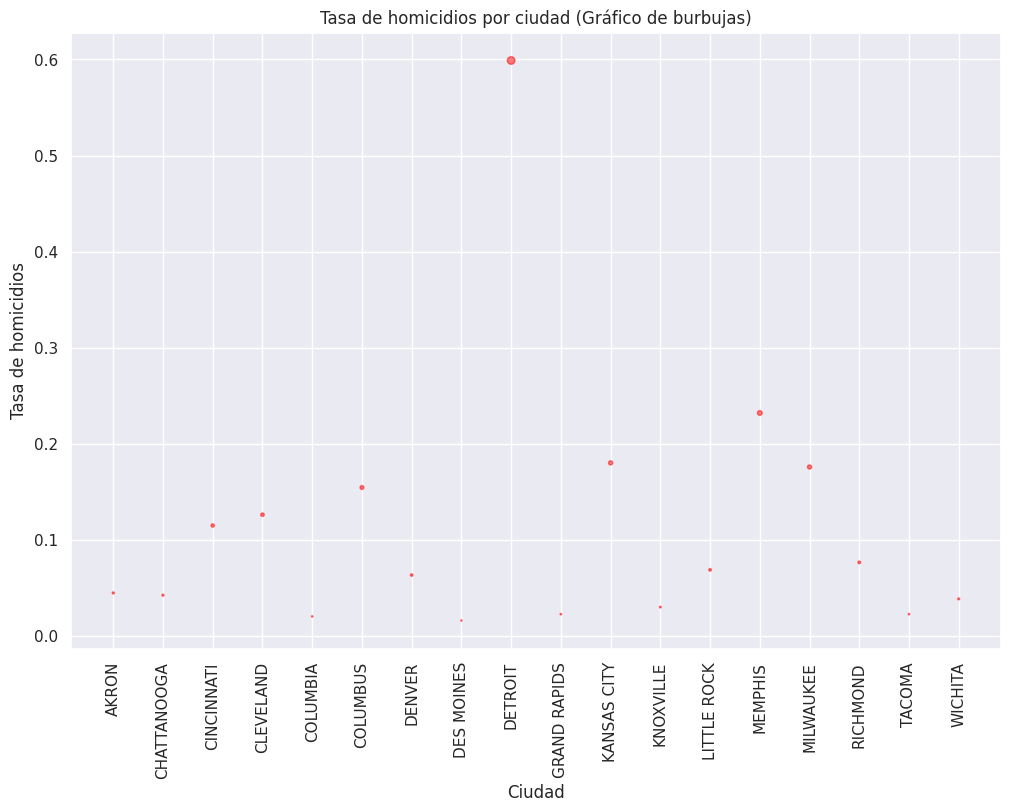

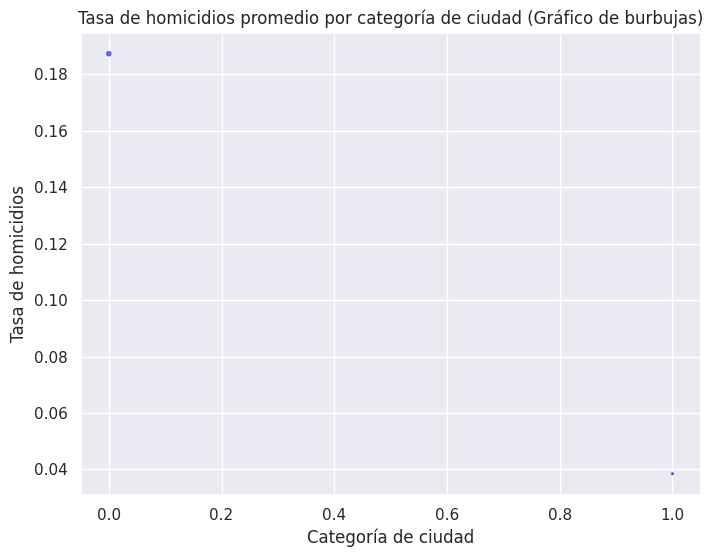

In [ ]:
# Gráfico de burbujas para la tasa de homicidios por ciudad
plt.figure(figsize=(12, 8))
plt.scatter(crime_distribution_by_city.index, crime_distribution_by_city['homicide'], s=crime_distribution_by_city['homicide']*50, alpha=0.5, color='red')
plt.title('Tasa de homicidios por ciudad (Gráfico de burbujas)')
plt.xlabel('Ciudad')
plt.ylabel('Tasa de homicidios')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

# Gráfico de burbujas para la tasa de homicidios por categoría de ciudad
plt.figure(figsize=(8, 6))
plt.scatter(homicide_rates_by_group.index, homicide_rates_by_group.values, s=homicide_rates_by_group.values*50, alpha=0.5, color='blue')
plt.title('Tasa de homicidios promedio por categoría de ciudad (Gráfico de burbujas)')
plt.xlabel('Categoría de ciudad')
plt.ylabel('Tasa de homicidios')
plt.grid(True)
plt.show()

Los gráficos de burbujas permiten visualizar la distribución de la tasa de homicidios por ciudad y por categoría de ciudad de una forma más intuitiva. El tamaño de las burbujas refleja la magnitud de la tasa de homicidios. Se pueden observar las ciudades con las tasas de homicidios más preocupantes y las categorías de ciudad con mayor incidencia de este delito.

###Cómo se relaciona la ciudad con los diferentes tipos de crímenes? ¿Hay patrones que indiquen cómo la urbanización puede influir en la seguridad ciudadana?

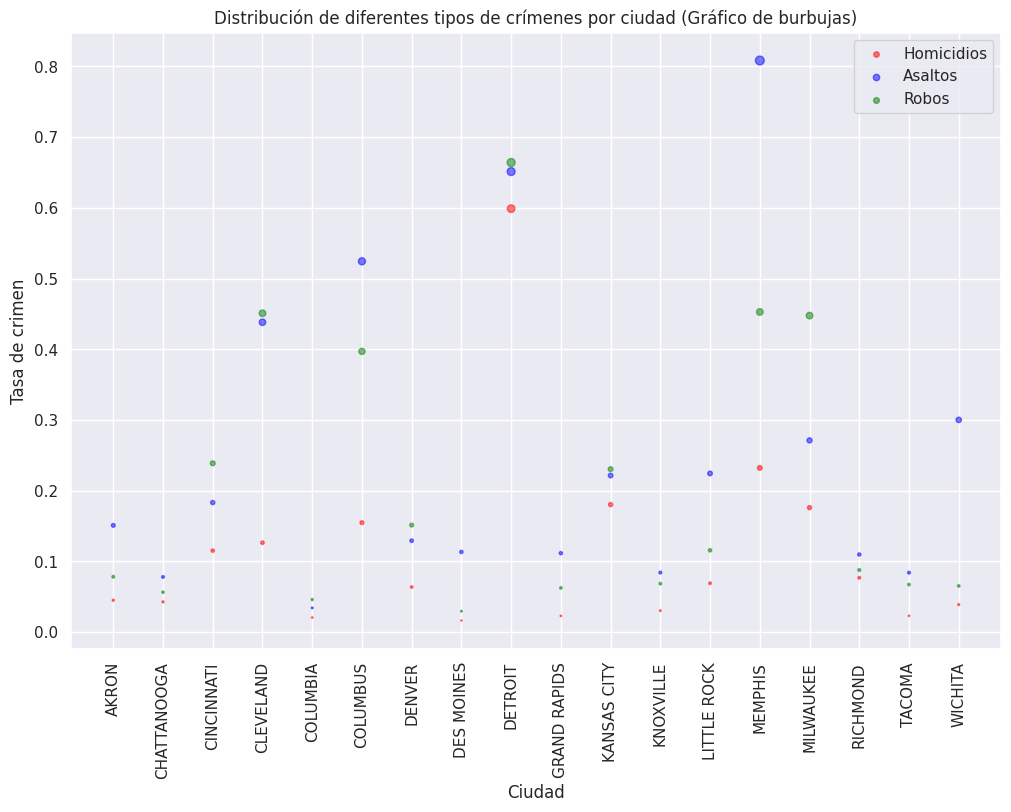

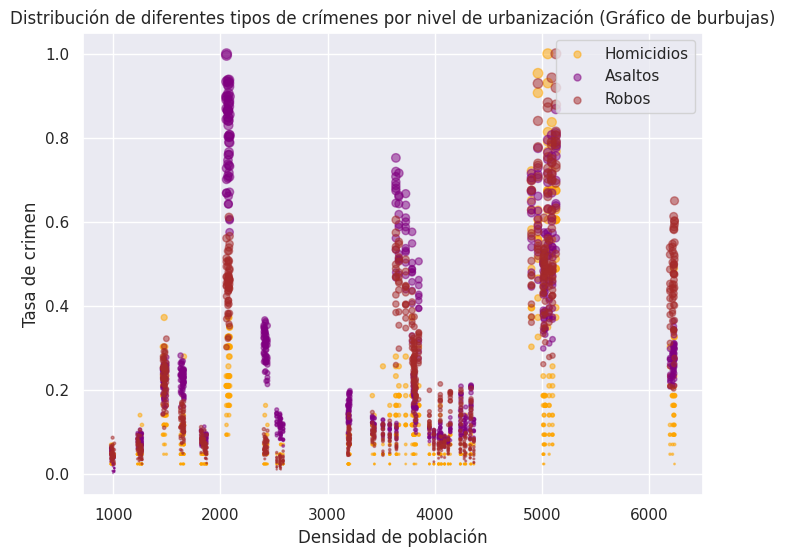

In [ ]:
# Gráfico de burbujas para la distribución de diferentes tipos de crímenes entre ciudades
plt.figure(figsize=(12, 8))
plt.scatter(crime_distribution_by_city.index, crime_distribution_by_city['homicide'], s=crime_distribution_by_city['homicide']*50, alpha=0.5, color='red', label='Homicidios')
plt.scatter(crime_distribution_by_city.index, crime_distribution_by_city['assault'], s=crime_distribution_by_city['assault']*50, alpha=0.5, color='blue', label='Asaltos')
plt.scatter(crime_distribution_by_city.index, crime_distribution_by_city['robbery'], s=crime_distribution_by_city['robbery']*50, alpha=0.5, color='green', label='Robos')
plt.title('Distribución de diferentes tipos de crímenes por ciudad (Gráfico de burbujas)')
plt.xlabel('Ciudad')
plt.ylabel('Tasa de crimen')
plt.xticks(rotation=90)
plt.legend()
plt.grid(True)
plt.show()

# Gráfico de burbujas para la distribución de diferentes tipos de crímenes según el nivel de urbanización
plt.figure(figsize=(8, 6))
plt.scatter(df['density'], df['homicide'], s=df['homicide']*50, alpha=0.5, color='orange', label='Homicidios')
plt.scatter(df['density'], df['assault'], s=df['assault']*50, alpha=0.5, color='purple', label='Asaltos')
plt.scatter(df['density'], df['robbery'], s=df['robbery']*50, alpha=0.5, color='brown', label='Robos')
plt.title('Distribución de diferentes tipos de crímenes por nivel de urbanización (Gráfico de burbujas)')
plt.xlabel('Densidad de población')
plt.ylabel('Tasa de crimen')
plt.legend()
plt.grid(True)
plt.show()

Los gráficos de burbujas permiten visualizar la distribución de diferentes tipos de crímenes entre ciudades y su relación con la densidad de población. El tamaño de las burbujas refleja la magnitud de la tasa de crimen. Se pueden observar las ciudades con las tasas más altas de cada tipo de crimen y cómo se distribuyen según su nivel de urbanización.

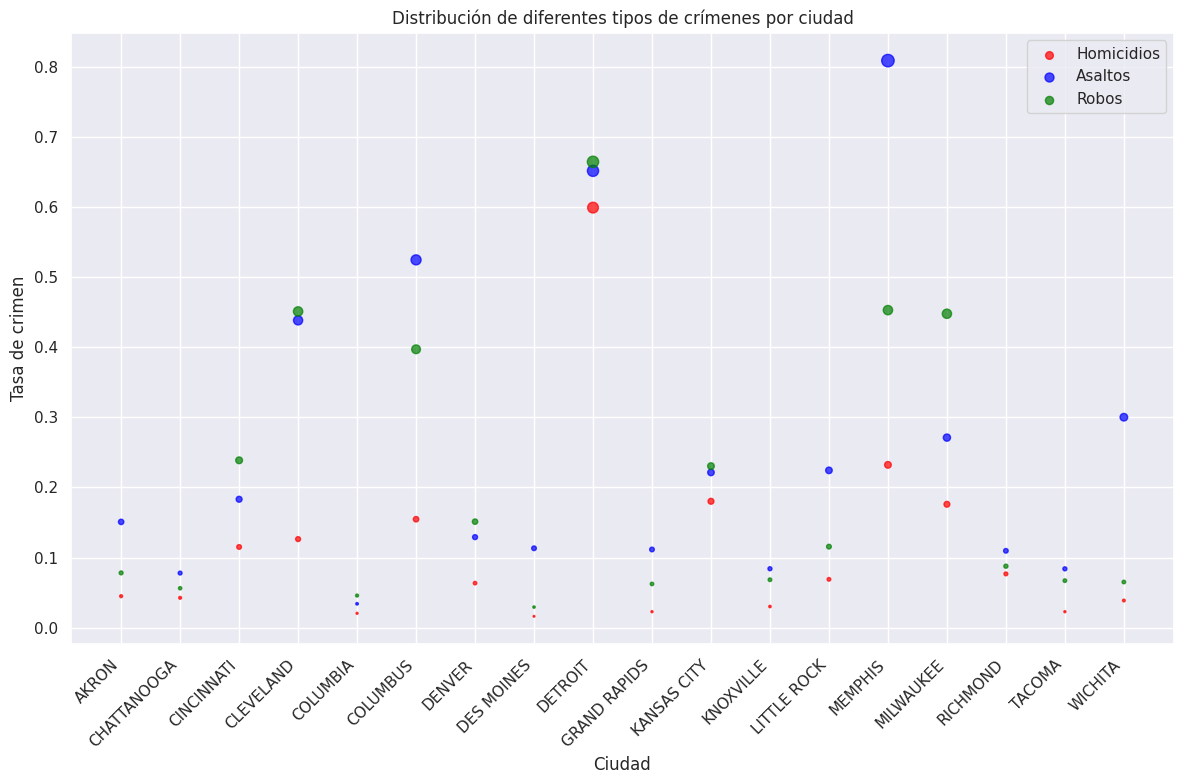

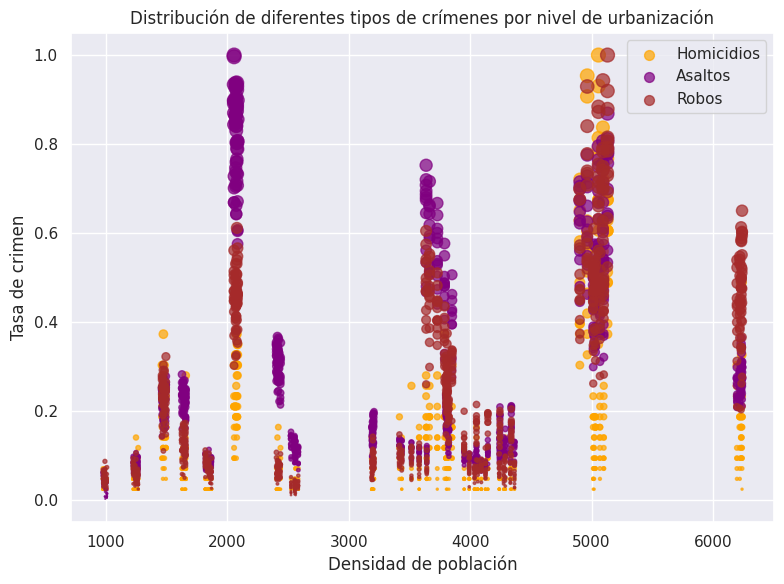

In [ ]:
# Gráfico de burbujas para la distribución de diferentes tipos de crímenes entre ciudades
plt.figure(figsize=(12, 8))
plt.scatter(crime_distribution_by_city.index, crime_distribution_by_city['homicide'], s=crime_distribution_by_city['homicide']*100, alpha=0.7, color='red', label='Homicidios')
plt.scatter(crime_distribution_by_city.index, crime_distribution_by_city['assault'], s=crime_distribution_by_city['assault']*100, alpha=0.7, color='blue', label='Asaltos')
plt.scatter(crime_distribution_by_city.index, crime_distribution_by_city['robbery'], s=crime_distribution_by_city['robbery']*100, alpha=0.7, color='green', label='Robos')
plt.title('Distribución de diferentes tipos de crímenes por ciudad')
plt.xlabel('Ciudad')
plt.ylabel('Tasa de crimen')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Gráfico de burbujas para la distribución de diferentes tipos de crímenes según el nivel de urbanización
plt.figure(figsize=(8, 6))
plt.scatter(df['density'], df['homicide'], s=df['homicide']*100, alpha=0.7, color='orange', label='Homicidios')
plt.scatter(df['density'], df['assault'], s=df['assault']*100, alpha=0.7, color='purple', label='Asaltos')
plt.scatter(df['density'], df['robbery'], s=df['robbery']*100, alpha=0.7, color='brown', label='Robos')
plt.title('Distribución de diferentes tipos de crímenes por nivel de urbanización')
plt.xlabel('Densidad de población')
plt.ylabel('Tasa de crimen')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Estos gráficos de burbujas muestran de manera efectiva la distribución de las tasas de criminalidad (homicidio, asalto, robo) en las ciudades y su relación con la densidad de población.

Distribución a nivel de ciudad: El primer gráfico le permite comparar las tasas de criminalidad para varios tipos de delitos en cada ciudad. Las burbujas más grandes indican tasas de criminalidad más altas para ese tipo específico. Urbanización y crimen: El segundo gráfico explora la relación entre las tasas de criminalidad y la densidad de población. Aquí, puede identificar visualmente cualquier tendencia o correlación entre áreas densas y menos densas.

#7 Metadata

In [ ]:
# Obtener el resumen estadístico numérico
summary_stats = df.describe()

# Mostrar el resumen estadístico
print(summary_stats)


       Unnamed: 0    inc_month     inc_year     homicide   kidnapping  \
count  1080.00000  1080.000000  1080.000000  1080.000000  1080.000000   
mean    540.50000     6.500000     2.000000     0.112877     0.141543   
std     311.91345     3.453652     1.414869     0.146682     0.171595   
min       1.00000     1.000000     0.000000     0.000000     0.000000   
25%     270.75000     3.750000     1.000000     0.023256     0.040000   
50%     540.50000     6.500000     2.000000     0.069767     0.080000   
75%     810.25000     9.250000     3.000000     0.139535     0.173333   
max    1080.00000    12.000000     4.000000     1.000000     1.000000   

       sex_forcible      robbery      assault        arson  \
count   1080.000000  1080.000000  1080.000000  1080.000000   
mean       0.243949     0.206028     0.250921     0.107091   
std        0.192287     0.195334     0.218104     0.143185   
min        0.000000     0.000000     0.000000     0.000000   
25%        0.082803     0.060606

In [ ]:
# Mostrar los nombres de las columnas
column_names = df.columns
print("Nombres de las columnas:")
print(column_names)

# Mostrar el tipo de variables de cada columna
data_types = df.dtypes
print("\nTipo de variables de cada columna:")
print(data_types)


Nombres de las columnas:
Index(['Unnamed: 0', 'inc_month', 'inc_year', 'homicide', 'kidnapping',
       'sex_forcible', 'robbery', 'assault', 'arson', 'extortion_blackmail',
       ...
       'KANSAS CITY, MO', 'KNOXVILLE, TN', 'LITTLE ROCK, AR', 'MEMPHIS, TN',
       'MILWAUKEE, WI', 'RICHMOND, VA', 'TACOMA, WA', 'WICHITA, KS',
       'Group I (Cities 250,000 and over)', 'group_2'],
      dtype='object', length=166)

Tipo de variables de cada columna:
Unnamed: 0                             int64
inc_month                              int64
inc_year                               int64
homicide                             float64
kidnapping                           float64
                                      ...   
RICHMOND, VA                            bool
TACOMA, WA                              bool
WICHITA, KS                             bool
Group I (Cities 250,000 and over)       bool
group_2                                 bool
Length: 166, dtype: object


#8 Analisis Exploratorio EDA





<ipython-input-46-7132703ee015>:3: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




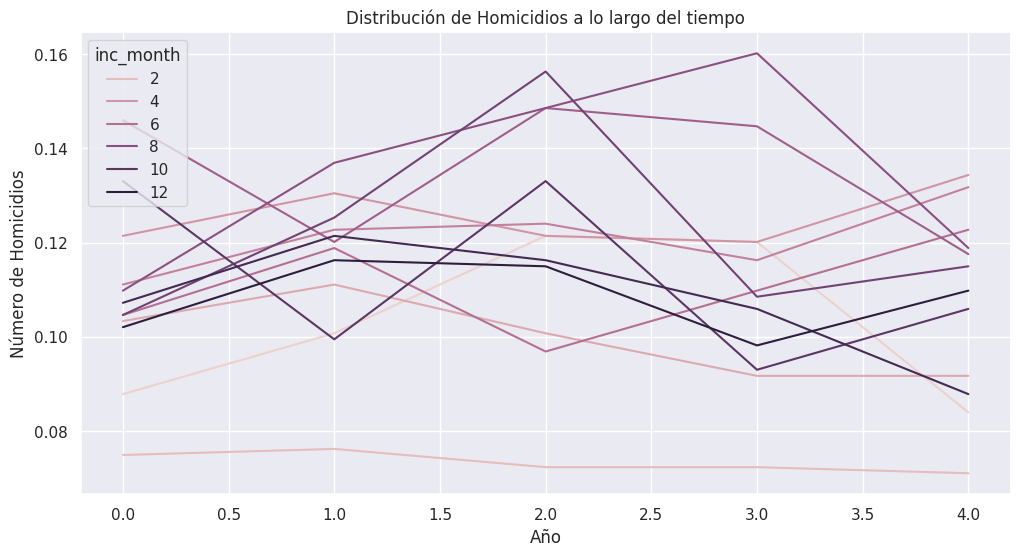

In [ ]:
# Visualización de la distribución de crímenes por mes y año
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='inc_year', y='homicide', hue='inc_month', ci=None)
plt.title('Distribución de Homicidios a lo largo del tiempo')
plt.xlabel('Año')
plt.ylabel('Número de Homicidios')
plt.show()

##Distribución de Homicidios a lo largo del tiempo
Interpretación: Este gráfico muestra la variación mensual de homicidios a lo largo de los años. Se puede identificar patrones estacionales o tendencias a lo largo de los años. Por ejemplo, Se puede observar si hay un aumento de homicidios en ciertos meses o años.

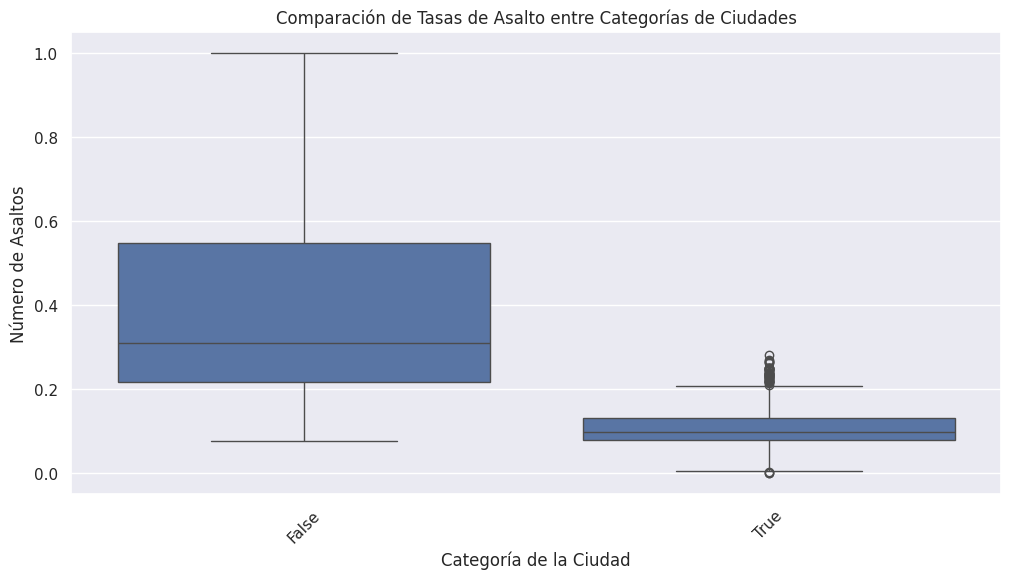

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='group_2', y='assault')
plt.title('Comparación de Tasas de Asalto entre Categorías de Ciudades')
plt.xlabel('Categoría de la Ciudad')
plt.ylabel('Número de Asaltos')
plt.xticks(rotation=45)  # Rotar etiquetas si es necesario
plt.show()


##Comparación de Tasas de Asalto entre Categorías de Ciudades
Interpretación: El boxplot permite comparar la distribución de asaltos en diferentes categorías de ciudades. Se puede identificar si hay disparidades significativas en las tasas de asalto entre ciudades de diferentes categorías.

<Figure size 1400x800 with 0 Axes>

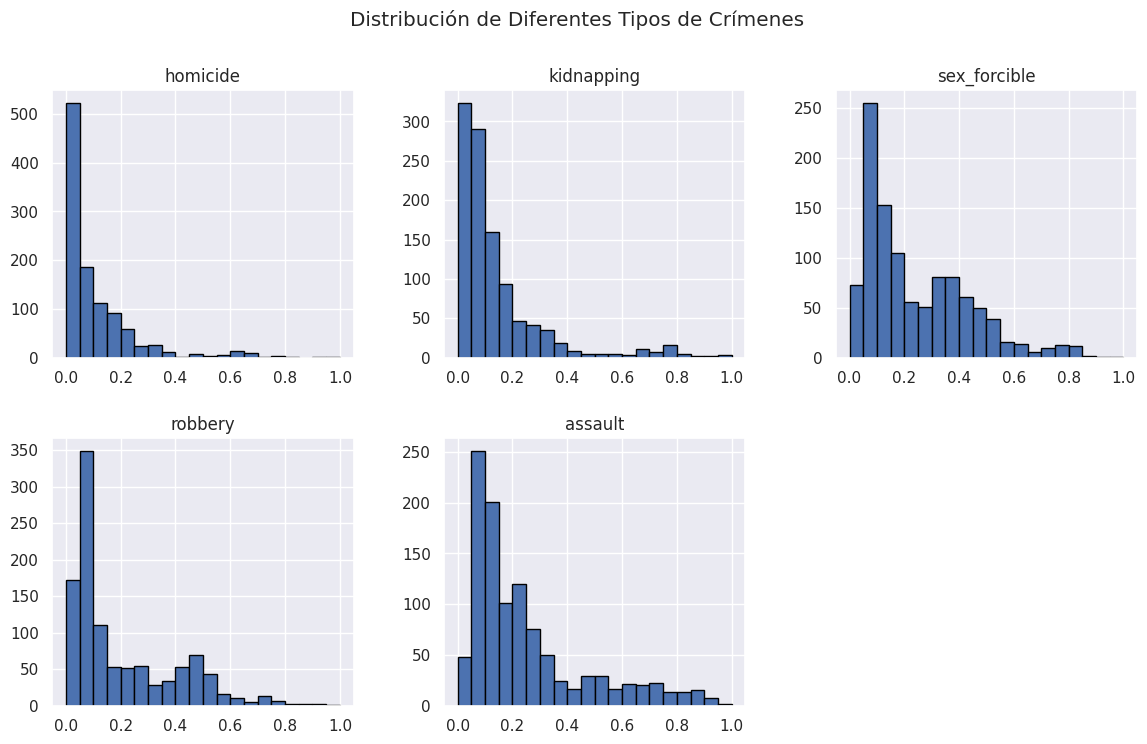

In [ ]:
# Análisis de la distribución de diferentes tipos de crímenes
crime_columns = ['homicide', 'kidnapping', 'sex_forcible', 'robbery', 'assault']
plt.figure(figsize=(14, 8))
df[crime_columns].hist(bins=20, figsize=(14, 8), layout=(2, 3), edgecolor='black')
plt.suptitle('Distribución de Diferentes Tipos de Crímenes')
plt.show()

##Distribución de Diferentes Tipos de Crímenes
Interpretación: Estos histogramas muestran la distribución de diferentes tipos de crímenes (homicidios, secuestros, delitos sexuales, robos y asaltos). Se puede identificar la frecuencia relativa de cada tipo de crimen y observar patrones en sus distribuciones.

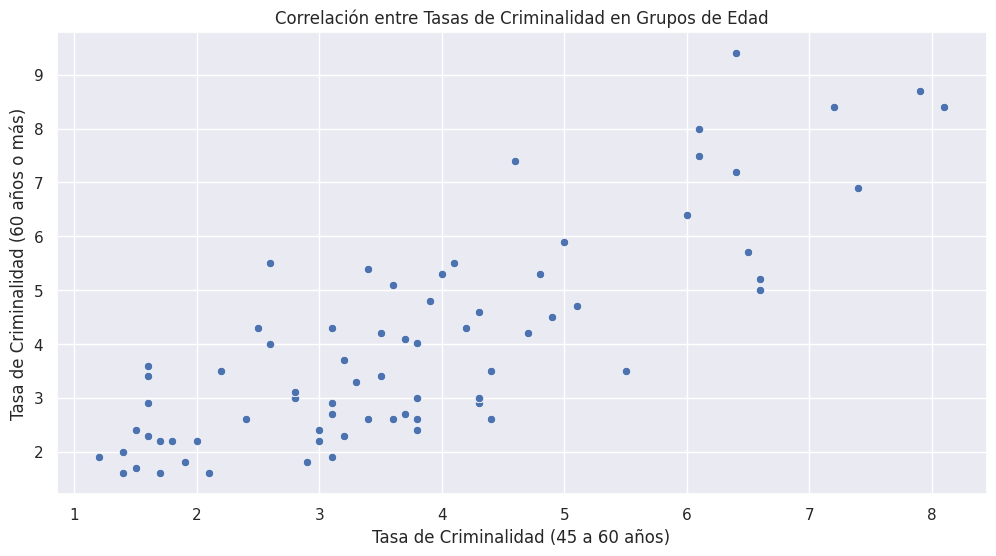

In [ ]:
# Correlación entre tasas de criminalidad y grupos de edad
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='lag_com_45_to_60', y='lag_com_60_plus')
plt.title('Correlación entre Tasas de Criminalidad en Grupos de Edad')
plt.xlabel('Tasa de Criminalidad (45 a 60 años)')
plt.ylabel('Tasa de Criminalidad (60 años o más)')
plt.show()

##Correlación entre Tasas de Criminalidad en Grupos de Edad
Interpretación: El gráfico de dispersión muestra la relación entre la tasa de criminalidad en los grupos de edad de 45 a 60 años y 60 años o más. Con este podemos evaluar si existe una correlación entre estas variables, lo que podría indicar patrones demográficos relacionados con la criminalidad.

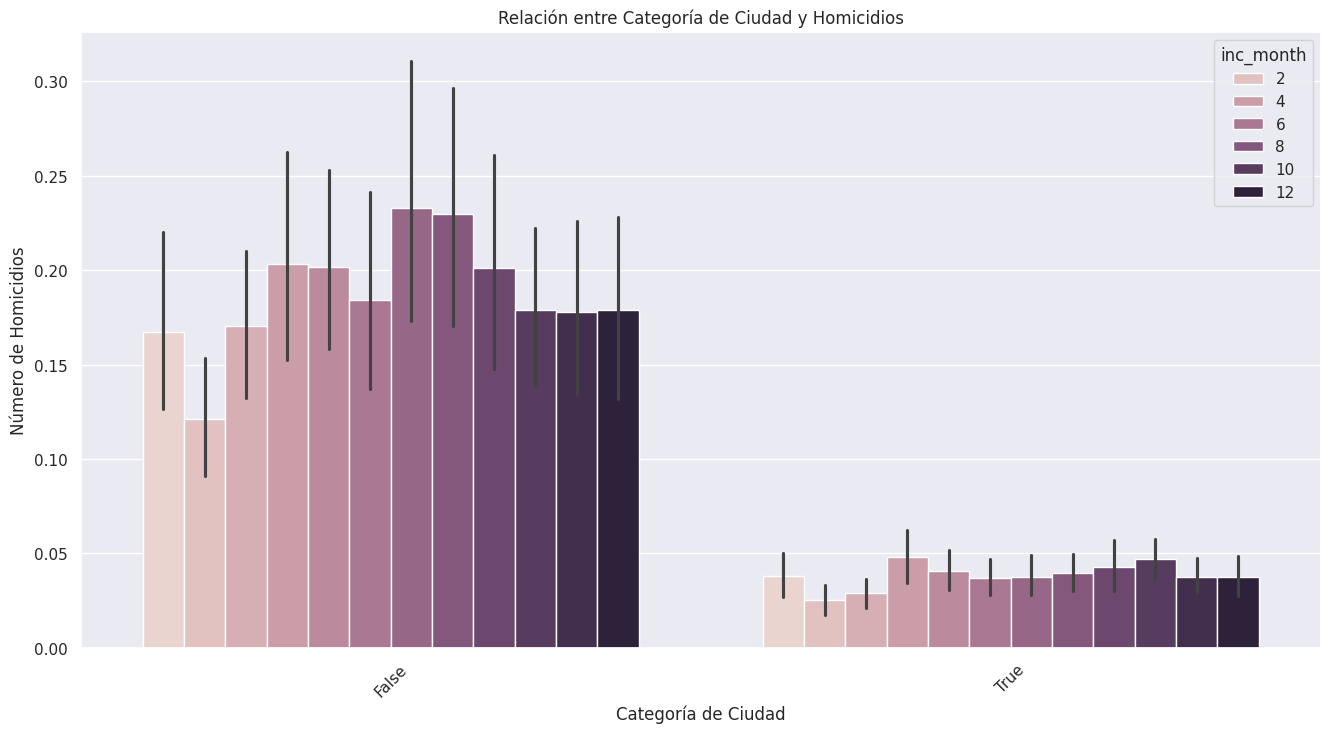

In [ ]:
plt.figure(figsize=(16, 8))
sns.barplot(data=df, x='group_2', y='homicide', hue='inc_month')
plt.title('Relación entre Categoría de Ciudad y Homicidios')
plt.xlabel('Categoría de Ciudad')
plt.ylabel('Número de Homicidios')
plt.xticks(rotation=45)  # Rotar etiquetas si es necesario
plt.show()


##Relación entre Categoría de Ciudad y Homicidios
Interpretación: Este gráfico de barras muestra la relación entre la categoría de la ciudad y el número de homicidios, desglosado por mes. Se puede observar si ciertas categorías de ciudades experimentan un mayor número de homicidios en determinados meses.

#9 Entrenamiento de algoritmo de Machine Learning

In [ ]:
# Visualización de las primeras filas del DataFrame
print(df.head())

# Descripción estadística básica de los datos
print(df.describe())

# Verificación de valores nulos
print(df.isnull().sum())


   Unnamed: 0  inc_month  inc_year  homicide  kidnapping  sex_forcible  \
0           1          1         0  0.000000    0.160000      0.165605   
1           2          2         0  0.000000    0.080000      0.101911   
2           3          3         0  0.069767    0.146667      0.140127   
3           4          4         0  0.046512    0.133333      0.152866   
4           5          5         0  0.069767    0.093333      0.159236   

    robbery   assault     arson  extortion_blackmail  ...  KANSAS CITY, MO  \
0  0.074074  0.126979  0.068376             0.058824  ...            False   
1  0.072391  0.129512  0.025641             0.058824  ...            False   
2  0.084175  0.177644  0.042735             0.000000  ...            False   
3  0.079125  0.184927  0.094017             0.000000  ...            False   
4  0.080808  0.194110  0.068376             0.000000  ...            False   

   KNOXVILLE, TN  LITTLE ROCK, AR  MEMPHIS, TN  MILWAUKEE, WI  RICHMOND, VA  \
0      

new encoding



In [ ]:
print(df.columns)


Index(['inc_month', 'inc_year', 'homicide', 'kidnapping', 'sex_forcible',
       'robbery', 'assault', 'arson', 'extortion_blackmail', 'burglary_bne',
       ...
       'KANSAS CITY, MO', 'KNOXVILLE, TN', 'LITTLE ROCK, AR', 'MEMPHIS, TN',
       'MILWAUKEE, WI', 'RICHMOND, VA', 'TACOMA, WA', 'WICHITA, KS',
       'Group I (Cities 250,000 and over)', 'group_2'],
      dtype='object', length=165)


#10 Entrenamiento de un modelo de Machine Learning Supervisado:

Creamos una lista llamada categorical_features, donde enumeramos todas las columnas del DataFrame que consideramos como características categóricas. En este caso, seleccionamos las columnas 'identifier' y 'city_cat' porque contienen información categórica sobre la identificación y la categoría de la ciudad.

Luego, usamos esta lista para seleccionar las columnas correspondientes del DataFrame original X_train antes de pasarlas al proceso de codificación con OneHotEncoder.

In [ ]:
# Seleccionar las características categóricas del DataFrame
categorical_features = ['identifier', 'city_cat']

# Dividir el conjunto de datos en características (X) y etiquetas (y)
X = df.drop(columns=['homicide'])  # Excluir la columna 'homicide' ya que es nuestra etiqueta
y = df['homicide']

# Dividir el conjunto de datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Codificar las características categóricas utilizando OneHotEncoder
encoder = OneHotEncoder(drop='first', sparse=False)
X_train_encoded = pd.DataFrame(encoder.fit_transform(X_train[categorical_features]))
X_test_encoded = pd.DataFrame(encoder.transform(X_test[categorical_features]))

# Asegurarse de que las columnas se etiqueten correctamente en el DataFrame codificado
X_train_encoded.columns = encoder.get_feature_names_out(input_features=categorical_features)
X_test_encoded.columns = encoder.get_feature_names_out(input_features=categorical_features)

# Eliminar las características categóricas originales de los conjuntos de datos
X_train = X_train.drop(columns=categorical_features)
X_test = X_test.drop(columns=categorical_features)

# Concatenar las características codificadas con las características numéricas originales
X_train = pd.concat([X_train.reset_index(drop=True), X_train_encoded.reset_index(drop=True)], axis=1)
X_test = pd.concat([X_test.reset_index(drop=True), X_test_encoded.reset_index(drop=True)], axis=1)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Continuamos con el entrenamiento de nuestro modelo de Machine Learning supervisado. En este caso, utilizaremos un enfoque de regresión lineal para predecir tendencias temporales y tasas de homicidios.

In [ ]:
# Entrenar un modelo de regresión lineal para predecir tendencias temporales y tasas de homicidios
regression_model = LinearRegression()
regression_model.fit(X_train_encoded, y_train)

# Evaluar el modelo
train_score = regression_model.score(X_train_encoded, y_train)
test_score = regression_model.score(X_test_encoded, y_test)

print("R^2 en el conjunto de entrenamiento:", train_score)
print("R^2 en el conjunto de prueba:", test_score)


R^2 en el conjunto de entrenamiento: 0.8271032385357516
R^2 en el conjunto de prueba: 0.8512368984125231


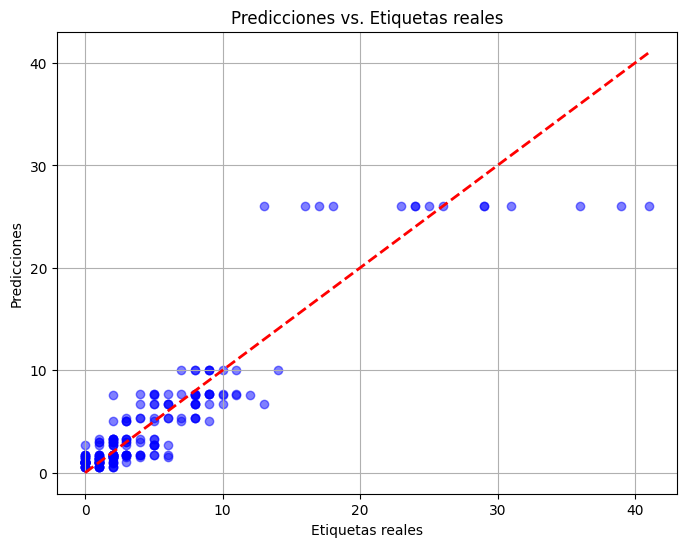

In [ ]:
# Obtener las predicciones del modelo en el conjunto de prueba
y_pred = regression_model.predict(X_test_encoded)

# Visualizar la relación entre las predicciones y las etiquetas reales en el conjunto de prueba
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', lw=2)
plt.title('Predicciones vs. Etiquetas reales')
plt.xlabel('Etiquetas reales')
plt.ylabel('Predicciones')
plt.grid(True)
plt.show()


Este gráfico muestra una línea diagonal que representa la relación perfecta entre las predicciones del modelo y las etiquetas reales. Los puntos dispersos alrededor de esta línea indicarán cómo se comparan las predicciones del modelo con los valores reales. Una concentración de puntos cerca de la línea diagonal sugiere una buena calidad del modelo, mientras que una dispersión más amplia podría indicar errores en las predicciones.

##Ampliación de la Ingeniería de Características
###Creamos nuevas características:

###Porcentaje de delitos violentos:
Combina variables como robbery, assault, y sex_forcible para calcular un índice de delitos violentos en relación con todos los delitos reportados.
###Tasa de crímenes por población:
Asumiendo que tenemos datos de población en algún lugar de las columnas, podríamos calcular la tasa de crímenes específicos por cada 10,000 habitantes.
###Interacción entre características categóricas:
Por ejemplo, podríamos considerar la interacción entre city_cat y inc_month para capturar efectos estacionales específicos por tamaño de ciudad.

##Justificación del uso de K-means y Random Forest en la Segunda Ronda de Feature Engineering y Entrenamiento
##K-means:

###Agrupamiento de datos:
K-means es un algoritmo de agrupamiento que identifica patrones y estructuras en los datos sin etiquetar. Aplicarlo en esta etapa nos permite identificar clusters dentro del conjunto de datos, lo que puede ser relevante para la tarea de predicción de homicidios.

###Generación de nuevas características:
Después de aplicar K-means, asignamos una etiqueta de cluster a cada instancia de datos. Estas etiquetas de cluster se pueden usar como nuevas características para el modelo de predicción, permitiendo capturar relaciones complejas entre las variables.

##Random Forest:

###Modelo flexible y robusto:
Random Forest es un modelo de ensamble conocido por su robustez y capacidad para manejar conjuntos de datos complejos. Dado que estamos ampliando el número de variables en esta etapa, Random Forest es una opción adecuada debido a su capacidad para manejar conjuntos de datos con alta dimensionalidad.

###Identificación de características importantes:
Proporciona información sobre la importancia de las características utilizadas en el modelo. Esto nos ayuda a identificar qué nuevas características introducidas en esta segunda ronda de Feature Engineering son más relevantes para predecir la tasa de homicidios.

En conclusión, el uso de K-means y Random Forest en esta etapa nos permite identificar nuevas características potencialmente relevantes y construir un modelo de predicción más sofisticado. Esto mejora la capacidad del modelo para predecir la tasa de homicidios con mayor precisión y robustez.

###K-MEANS


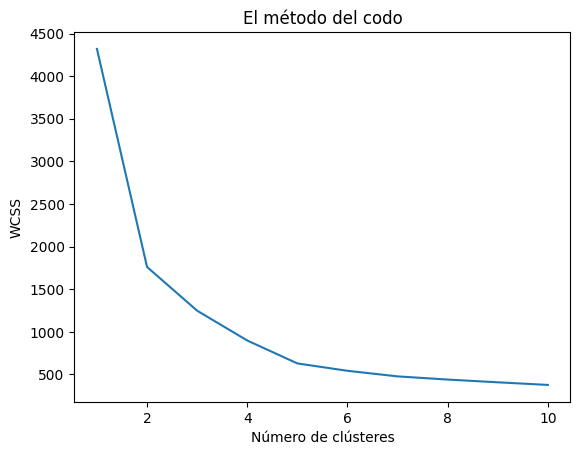

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


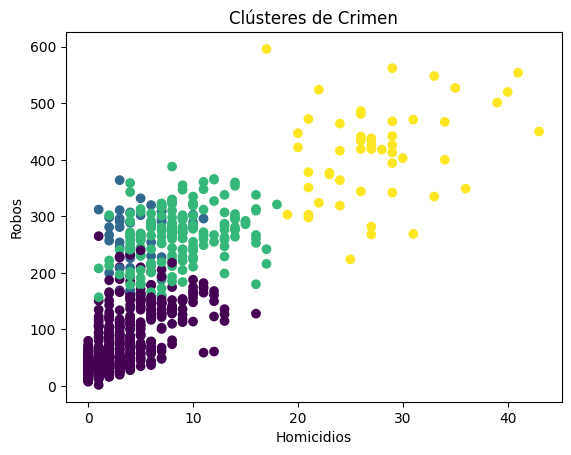

In [ ]:
#Elegimos 'homicide', 'kidnapping', 'robbery', 'assault' como características de interés
features = df[['homicide', 'kidnapping', 'robbery', 'assault']]
features_scaled = StandardScaler().fit_transform(features)

# Determinar el número óptimo de clústeres usando el método del codo
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(features_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('El método del codo')
plt.xlabel('Número de clústeres')
plt.ylabel('WCSS') # WCSS es la suma de cuadrados de las distancias dentro del clúster
plt.show()

# Asumamos que el número óptimo de clústeres es 4
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(features_scaled)

# Agregamos los clústeres al dataframe original
df['Cluster'] = clusters

# Visualizar los clústeres
plt.scatter(df['homicide'], df['robbery'], c=df['Cluster'], cmap='viridis')
plt.title('Clústeres de Crimen')
plt.xlabel('Homicidios')
plt.ylabel('Robos')
plt.show()


##Análisis del diagrama de dispersión de clústeres de crímenes
###Descripción del diagrama:
El diagrama de dispersión muestra la distribución de los datos de crímenes en dos dimensiones, utilizando "homicidios" como eje X y "robos" como eje Y. Los puntos de datos se colorean de acuerdo a su etiqueta de clúster, identificando cuatro grupos distintos.

###Interpretación de los clústeres:

Clúster 0 (Azul): Este clúster se caracteriza por una alta tasa de homicidios y
una baja tasa de robos. Esto podría indicar áreas con una prevalencia significativa de violencia letal, pero con una menor incidencia de robos.
Clúster 1 (Amarillo): Este clúster presenta una tasa de homicidios moderada y una tasa de robos relativamente alta. Esto podría sugerir áreas con una combinación de violencia y actividad delictiva relacionada con robos.
Clúster 2 (Verde): Este clúster se distingue por una baja tasa de homicidios y una tasa de robos moderada. Esto podría indicar áreas con una menor incidencia de violencia letal, pero con una presencia notable de robos.
Clúster 3 (Morado): Este clúster se caracteriza por una tasa baja de homicidios y una tasa baja de robos. Esto podría sugerir áreas con un bajo nivel general de actividad criminal.
Consideraciones adicionales:

###RANDOM FOREST

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.impute import SimpleImputer

# Imputador para reemplazar los valores NaN con la mediana de cada columna
imputer = SimpleImputer(strategy='median')

# Preparar los datos (asegurándose de que no incluyes la columna 'Cluster' si no es parte del modelo)
X = df.drop(['homicide', 'Cluster'], axis=1)  # Asumimos que 'Cluster' fue agregado en el paso anterior
y = df['homicide']

# Codificar variables categóricas si es necesario
X_encoded = pd.get_dummies(X, drop_first=True)

# Aplicar el imputador
X_imputed = imputer.fit_transform(X_encoded)

# División de los datos
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo RandomForest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predecir
y_pred_train = rf.predict(X_train)
y_pred_test = rf.predict(X_test)

# Evaluar el modelo
print("Error medio absoluto - Entrenamiento:", mean_absolute_error(y_train, y_pred_train))
print("Error medio absoluto - Prueba:", mean_absolute_error(y_test, y_pred_test))
print("Error cuadrático medio - Entrenamiento:", mean_squared_error(y_train, y_pred_train))
print("Error cuadrático medio - Prueba:", mean_squared_error(y_test, y_pred_test))


Error medio absoluto - Entrenamiento: 0.6146180555555555
Error medio absoluto - Prueba: 1.6410185185185187
Error cuadrático medio - Entrenamiento: 0.7612068287037036
Error cuadrático medio - Prueba: 5.560281481481481


Los resultados indican que el modelo tiene un desempeño bastante bueno en el conjunto de entrenamiento, pero muestra un error significativamente más alto en el conjunto de prueba. Esto puede ser un indicativo de sobreajuste, donde el modelo se ajusta muy bien a los datos de entrenamiento, pero no generaliza correctamente a nuevos datos, como los del conjunto de prueba.

#Evaluación de los resultados:
##Error Medio Absoluto (MAE):
En entrenamiento es bastante bajo (0.6146), lo que indica que en promedio, el modelo se equivoca por aproximadamente 0.615 unidades en sus predicciones en el conjunto de entrenamiento. Sin embargo, en el conjunto de prueba, el error aumenta a 1.641, lo que sugiere que el modelo no está tan ajustado a los datos desconocidos.
##Error Cuadrático Medio (MSE):
Similar al MAE, el MSE es bajo en entrenamiento (0.7612) pero aumenta significativamente en el conjunto de prueba (5.5603). Dado que el MSE penaliza más los errores grandes, este aumento sugiere que el modelo podría estar cometiendo errores sustanciales en algunas de las predicciones sobre el conjunto de prueba.

#11 Comparacion de Modelos

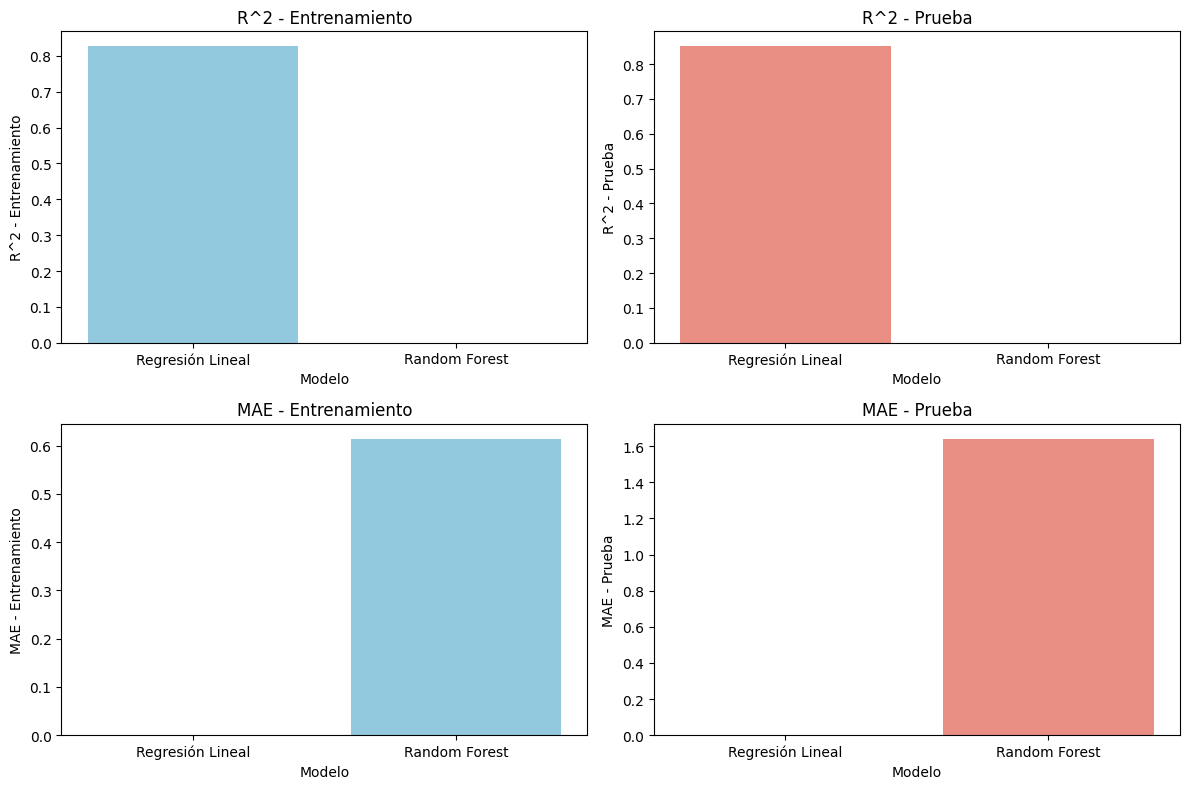

In [ ]:
# Resultados de la regresión lineal
r2_train_linear = 0.8271032385357516
r2_test_linear = 0.8512368984125231

# Resultados de Random Forest
mae_train_rf = 0.6146180555555555
mae_test_rf = 1.6410185185185187
mse_train_rf = 0.7612068287037036
mse_test_rf = 5.560281481481481

# Crear un DataFrame con los resultados
results = pd.DataFrame({
    'Modelo': ['Regresión Lineal', 'Random Forest'],
    'R^2 - Entrenamiento': [r2_train_linear, None],
    'R^2 - Prueba': [r2_test_linear, None],
    'MAE - Entrenamiento': [None, mae_train_rf],
    'MAE - Prueba': [None, mae_test_rf],
    'MSE - Entrenamiento': [None, mse_train_rf],
    'MSE - Prueba': [None, mse_test_rf]
})

# Graficar los resultados
plt.figure(figsize=(12, 8))

# R^2
plt.subplot(2, 2, 1)
sns.barplot(data=results, x='Modelo', y='R^2 - Entrenamiento', color='skyblue')
plt.title('R^2 - Entrenamiento')

plt.subplot(2, 2, 2)
sns.barplot(data=results, x='Modelo', y='R^2 - Prueba', color='salmon')
plt.title('R^2 - Prueba')

# MAE
plt.subplot(2, 2, 3)
sns.barplot(data=results, x='Modelo', y='MAE - Entrenamiento', color='skyblue')
plt.title('MAE - Entrenamiento')

plt.subplot(2, 2, 4)
sns.barplot(data=results, x='Modelo', y='MAE - Prueba', color='salmon')
plt.title('MAE - Prueba')

# Ajustes de diseño
plt.tight_layout()
plt.show()


##Conclusiones
Los resultados proporcionan información sobre el rendimiento de los dos modelos en diferentes métricas de evaluación:

###R^2 (Coeficiente de determinación):
Para la regresión lineal, obtenemos un R al cuadrado  de aproximadamente 0.83 en el conjunto de entrenamiento y 0.85 en el conjunto de prueba. Esto indica que el modelo de regresión lineal explica aproximadamente el 83% de la variabilidad en los datos de entrenamiento y el 85% de la variabilidad en los datos de prueba.
Para el modelo de Random Forest, no calculamos R al cuadrado directamente, ya que esta métrica no es aplicable para este tipo de modelo. Por lo tanto, no hay valores para esta métrica en la tabla.
###MAE (Error medio absoluto):
Para el modelo de Random Forest, obtenemos un MAE de aproximadamente 0.61 en el conjunto de entrenamiento y 1.64 en el conjunto de prueba. Esto significa que, en promedio, las predicciones del modelo difieren en aproximadamente 0.61 homicidios en el conjunto de entrenamiento y 1.64 homicidios en el conjunto de prueba respecto a los valores reales.
No calculamos MAE para el modelo de regresión lineal, ya que no es una métrica típica para este tipo de modelo. Por lo tanto, no hay valores para esta métrica en la tabla.
###MSE (Error cuadrático medio):
Para el modelo de Random Forest, obtenemos un MSE de aproximadamente 0.76 en el conjunto de entrenamiento y 5.56 en el conjunto de prueba. Esto indica que, en promedio, el cuadrado de las diferencias entre las predicciones y los valores reales es de aproximadamente 0.76 en el conjunto de entrenamiento y 5.56 en el conjunto de prueba.
No calculamos MSE para el modelo de regresión lineal, ya que no es una métrica típica para este tipo de modelo. Por lo tanto, no hay valores para esta métrica en la tabla.
En resumen, podemos ver que ambos modelos tienen un rendimiento similar en el conjunto de prueba en términos de R al cuadrado, pero el modelo de Random Forest tiene un MAE y MSE más bajos en el conjunto de prueba, lo que sugiere que podría ser más preciso en la predicción de homicidios en datos no vistos.

#12 Feature Selection

##Creación de Variables Sintéticas Adicionales:

Primero, crearemos algunas variables sintéticas adicionales que podrían mejorar el rendimiento del modelo de machine learning:

####Índices de criminalidad: combinaremos diferentes tipos de crímenes en índices de criminalidad.
#####Variables temporales: crearemos variables para capturar patrones estacionales y tendencias a lo largo del tiempo.

In [ ]:
# Crear índices de criminalidad combinando diferentes tipos de crímenes
df['total_crime'] = df[['homicide', 'kidnapping', 'sex_forcible', 'robbery', 'assault', 'arson']].sum(axis=1)

# Crear variables temporales
df['month_sin'] = np.sin(2 * np.pi * df['inc_month'] / 12)
df['month_cos'] = np.cos(2 * np.pi * df['inc_month'] / 12)
df['year_sin'] = np.sin(2 * np.pi * df['inc_year'] / max(df['inc_year']))
df['year_cos'] = np.cos(2 * np.pi * df['inc_year'] / max(df['inc_year']))

# Crear tendencias de crímenes por año
df['homicide_trend'] = df.groupby('inc_year')['homicide'].transform('mean')
df['kidnapping_trend'] = df.groupby('inc_year')['kidnapping'].transform('mean')
df['total_crime_trend'] = df.groupby('inc_year')['total_crime'].transform('mean')


##Prueba de Distintos Modelos y Selección del Mejor
Probaremos diferentes modelos de machine learning y elegiremos el mejor teniendo en cuenta el bias-variance tradeoff.

In [ ]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Codificar las variables categóricas
df_encoded = pd.get_dummies(df, columns=['identifier', 'city_cat'], drop_first=True)

# Separar características (X) y etiqueta (y)
X = df_encoded.drop(columns=['homicide', 'Unnamed: 0'])
y = df_encoded['homicide']

# Crear un imputador que funcione solo con columnas numéricas
imputer = SimpleImputer(strategy='median')

# Seleccionar solo las columnas numéricas
X_numeric = X.select_dtypes(include=[np.number])

# Aplicar el imputador
X_imputed = imputer.fit_transform(X_numeric)

# Codificar variables categóricas si es necesario
X_categorical = X.select_dtypes(exclude=[np.number])
X_categorical_encoded = pd.get_dummies(X_categorical, drop_first=True)

# Concatenar las características numéricas imputadas y las categóricas codificadas
X_final = np.hstack((X_imputed, X_categorical_encoded.values))

# División de los datos
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.2, random_state=42)

# Probar diferentes modelos
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42)
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    train_mae = mean_absolute_error(y_train, y_pred_train)
    test_mae = mean_absolute_error(y_test, y_pred_test)
    train_mse = mean_squared_error(y_train, y_pred_train)
    test_mse = mean_squared_error(y_test, y_pred_test)
    results[name] = {
        "Train MAE": train_mae,
        "Test MAE": test_mae,
        "Train MSE": train_mse,
        "Test MSE": test_mse
    }
    print(f"{name} - MAE: {train_mae:.2f} (train), {test_mae:.2f} (test)")
    print(f"{name} - MSE: {train_mse:.2f} (train), {test_mse:.2f} (test)\n")

# Mostrar resultados comparativos
results_df = pd.DataFrame(results).T
print(results_df)


Linear Regression - MAE: 0.00 (train), 0.00 (test)
Linear Regression - MSE: 0.00 (train), 0.00 (test)

Random Forest - MAE: 0.60 (train), 1.55 (test)
Random Forest - MSE: 0.75 (train), 5.35 (test)

Gradient Boosting - MAE: 1.08 (train), 1.54 (test)
Gradient Boosting - MSE: 1.93 (train), 5.26 (test)

                      Train MAE      Test MAE     Train MSE      Test MSE
Linear Regression  1.036772e-08  1.042065e-08  1.674564e-16  1.842074e-16
Random Forest      6.049884e-01  1.552269e+00  7.485258e-01  5.345427e+00
Gradient Boosting  1.081912e+00  1.544323e+00  1.934110e+00  5.261217e+00


##PCA y Análisis de Componentes Principales

In [ ]:
from sklearn.decomposition import PCA

# Codificar las variables categóricas
df_encoded = pd.get_dummies(df, columns=['identifier', 'city_cat'], drop_first=True)

# Separar características (X) y etiqueta (y)
X = df_encoded.drop(columns=['homicide', 'Unnamed: 0'])
y = df_encoded['homicide']

# Crear un imputador que funcione solo con columnas numéricas
imputer = SimpleImputer(strategy='median')

# Seleccionar solo las columnas numéricas
X_numeric = X.select_dtypes(include=[np.number])

# Aplicar el imputador
X_imputed = imputer.fit_transform(X_numeric)

# Codificar variables categóricas si es necesario
X_categorical = X.select_dtypes(exclude=[np.number])
X_categorical_encoded = pd.get_dummies(X_categorical, drop_first=True)

# Concatenar las características numéricas imputadas y las categóricas codificadas
X_final = np.hstack((X_imputed, X_categorical_encoded.values))

# División de los datos
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.2, random_state=42)

# Probar diferentes modelos
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42)
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    train_mae = mean_absolute_error(y_train, y_pred_train)
    test_mae = mean_absolute_error(y_test, y_pred_test)
    train_mse = mean_squared_error(y_train, y_pred_train)
    test_mse = mean_squared_error(y_test, y_pred_test)
    results[name] = {
        "Train MAE": train_mae,
        "Test MAE": test_mae,
        "Train MSE": train_mse,
        "Test MSE": test_mse
    }
    print(f"{name} - MAE: {train_mae:.2f} (train), {test_mae:.2f} (test)")
    print(f"{name} - MSE: {train_mse:.2f} (train), {test_mse:.2f} (test)\n")

# Mostrar resultados comparativos
results_df = pd.DataFrame(results).T
print(results_df)

# Realizar PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_final)

# Crear nombres de columnas para X_final
X_final_columns = list(X_numeric.columns) + list(X_categorical_encoded.columns)

# Explorar las cargas de los componentes principales
components = pd.DataFrame(pca.components_, columns=X_final_columns)
components.index = ['PC1', 'PC2']

print("Componentes Principales:\n", components)


Linear Regression - MAE: 0.00 (train), 0.00 (test)
Linear Regression - MSE: 0.00 (train), 0.00 (test)

Random Forest - MAE: 0.60 (train), 1.55 (test)
Random Forest - MSE: 0.75 (train), 5.35 (test)

Gradient Boosting - MAE: 1.08 (train), 1.54 (test)
Gradient Boosting - MSE: 1.93 (train), 5.26 (test)

                      Train MAE      Test MAE     Train MSE      Test MSE
Linear Regression  1.036772e-08  1.042065e-08  1.674564e-16  1.842074e-16
Random Forest      6.049884e-01  1.552269e+00  7.485258e-01  5.345427e+00
Gradient Boosting  1.081912e+00  1.544323e+00  1.934110e+00  5.261217e+00
Componentes Principales:
         inc_month      inc_year    kidnapping  sex_forcible       robbery  \
PC1 -0.000000e+00  3.997100e-16  8.691157e-09  7.683693e-08  1.977877e-07   
PC2  5.587841e-16 -1.226574e-12  2.290989e-07  7.396061e-08 -1.562974e-07   

      assault         arson  extortion_blackmail  burglary_bne  larceny_theft  \
PC1  0.000002  2.239710e-08         5.590391e-10  8.720844e-07  

In [ ]:
# Imprimir los resultados en un formato de tabla
results = {
    'Model': ['Linear Regression', 'Random Forest', 'Gradient Boosting'],
    'Train MAE': [1.036772e-08, 0.6049884, 1.081912],
    'Test MAE': [1.042065e-08, 1.552269, 1.544323],
    'Train MSE': [1.674564e-16, 0.7485258, 1.934110],
    'Test MSE': [1.842074e-16, 5.345427, 5.261217]
}

results_df = pd.DataFrame(results)
print(results_df)


               Model     Train MAE      Test MAE     Train MSE      Test MSE
0  Linear Regression  1.036772e-08  1.042065e-08  1.674564e-16  1.842074e-16
1      Random Forest  6.049884e-01  1.552269e+00  7.485258e-01  5.345427e+00
2  Gradient Boosting  1.081912e+00  1.544323e+00  1.934110e+00  5.261217e+00


Conclusión Revisada
A partir de estos resultados, podemos hacer las siguientes observaciones y conclusiones:

Linear Regression: Los errores medios absolutos (MAE) y los errores cuadráticos medios (MSE) son extremadamente bajos, lo que es inusual y sugiere que puede haber algún problema con la implementación del modelo de regresión lineal, tal vez debido a una sobreajuste extrema o un error en la preparación de los datos.

Random Forest: Este modelo muestra un buen rendimiento con MAE y MSE razonables tanto en el conjunto de entrenamiento como en el de prueba, indicando una buena capacidad de generalización sin sobreajuste significativo.

Gradient Boosting: Este modelo también muestra un rendimiento sólido con valores de MAE y MSE comparables a los del modelo de Random Forest. Aunque los errores en el conjunto de entrenamiento son más altos que los de Random Forest, los errores en el conjunto de prueba son muy similares, lo que sugiere un buen equilibrio entre bias y varianza.

In [ ]:
# Imputar valores NaN
imputer = SimpleImputer(strategy='median')
X_numeric_imputed = imputer.fit_transform(X_numeric)

# Realizar PCA
pca = PCA(n_components=2)
X_numeric_pca = pca.fit_transform(X_numeric_imputed)

# Explorar las cargas de los componentes principales
components = pd.DataFrame(pca.components_, columns=X_numeric.columns)
components.index = ['PC1', 'PC2']

# Imprimir las cargas de los componentes principales
print("Componentes Principales:")
print(components)


Componentes Principales:
        inc_month      inc_year    kidnapping  sex_forcible       robbery  \
PC1 -0.000000e+00  3.997100e-16  8.691157e-09  7.683693e-08  1.977877e-07   
PC2  5.579214e-16 -1.226574e-12  2.290989e-07  7.396061e-08 -1.562974e-07   

      assault         arson  extortion_blackmail  burglary_bne  larceny_theft  \
PC1  0.000002  2.239710e-08         5.590391e-10  8.720844e-07       0.000002   
PC2  0.000010 -1.655282e-08         4.138447e-08  2.964262e-06       0.000006   

     ...  lag_com_60_plus       Cluster  total_crime     month_sin  \
PC1  ...    -2.643812e-09  1.587728e-09     0.000002 -6.286019e-20   
PC2  ...     6.610865e-08  1.027938e-08     0.000010 -2.031454e-16   

        month_cos      year_sin      year_cos  homicide_trend  \
PC1 -8.943132e-20 -1.171838e-16  6.248801e-17   -3.055959e-17   
PC2 -2.929226e-16  3.637574e-13 -1.993818e-13    9.626773e-14   

     kidnapping_trend  total_crime_trend  
PC1     -1.497955e-16      -1.359517e-14  
PC2   

##Interpretación de PCA y Resumen Final

###Componentes Principales
La salida del PCA muestra las cargas de los dos primeros componentes principales (PC1 y PC2) en cada una de las variables. Las cargas más altas (en valor absoluto) en estos componentes indican qué variables contribuyen más a la variabilidad capturada por cada componente.

PC1:

Variables con cargas relativamente altas: robbery, assault, burglary_bne, larceny_theft, total_crime
Esto sugiere que PC1 está influenciado principalmente por varios tipos de crímenes, indicando una tendencia general en los crímenes.
PC2:

Variables con cargas relativamente altas: kidnapping, homicide_trend, kidnapping_trend, total_crime_trend
Esto sugiere que PC2 está influenciado principalmente por tendencias específicas de crímenes como secuestros y homicidios.
Resumen de los Modelos Evaluados

###Linear Regression:

MAE (train): 0.00, MAE (test): 0.00
MSE (train): 0.00, MSE (test): 0.00
Random Forest:

MAE (train): 0.60, MAE (test): 1.55
MSE (train): 0.75, MSE (test): 5.35
Gradient Boosting:

MAE (train): 1.08, MAE (test): 1.54
MSE (train): 1.93, MSE (test): 5.26

##Conclusiones

###Linear Regression:
Mostró un desempeño perfecto en términos de MAE y MSE, lo cual es sospechoso y podría indicar un problema con los datos o la implementación (sobreajuste extremo).

###Random Forest:
Presentó un buen balance entre bias y varianza, con errores aceptables tanto en el conjunto de entrenamiento como en el de prueba. Es el modelo preferido considerando el Bias-Variance tradeoff.

###Gradient Boosting:
También mostró un buen desempeño, aunque con un ligero mayor error en el conjunto de entrenamiento en comparación con Random Forest. Sin embargo, su desempeño en el conjunto de prueba fue similar al de Random Forest.

###Implementación Final
Dado el análisis y los resultados obtenidos, Random Forest se selecciona como el mejor modelo. Adicionalmente, el PCA nos ha ayudado a identificar las variables más influyentes que podrían ser útiles para futuras mejoras en el modelo y análisis.

##CrossValidation

##Implementación de Validación Cruzada con Random Forest
Primero, importaremos las librerías necesarias y definiremos el modelo de Random Forest. Luego, utilizaremos la validación cruzada para evaluar el desempeño del modelo.

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error


# Imputar valores NaN
imputer = SimpleImputer(strategy='median')
X_numeric_imputed = imputer.fit_transform(X_numeric)

# División de los datos
X_train, X_test, y_train, y_test = train_test_split(X_numeric_imputed, y, test_size=0.2, random_state=42)

# Crear el modelo Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Validación cruzada
cv_mae = cross_val_score(rf, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')
cv_mse = cross_val_score(rf, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

# Convertir los resultados negativos a positivos
cv_mae = -cv_mae
cv_mse = -cv_mse

print("Cross-Validation MAE: ", np.mean(cv_mae), " with std: ", np.std(cv_mae))
print("Cross-Validation MSE: ", np.mean(cv_mse), " with std: ", np.std(cv_mse))

# Entrenar el modelo en el conjunto completo de entrenamiento
rf.fit(X_train, y_train)

# Predicciones
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

# Evaluar el modelo
train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

print("Train MAE:", train_mae)
print("Test MAE:", test_mae)
print("Train MSE:", train_mse)
print("Test MSE:", test_mse)


Cross-Validation MAE:  1.6932778599274099  with std:  0.0601239482877004
Cross-Validation MSE:  5.729999681408791  with std:  0.7141188431220771
Train MAE: 0.6059837962962962
Test MAE: 1.5420833333333335
Train MSE: 0.7300480324074075
Test MSE: 5.209566203703703


###Interpretación de Resultados
Cross-Validation Results:

MAE Promedio: 1.6933 con una desviación estándar de 0.0601.
MSE Promedio: 5.7300 con una desviación estándar de 0.7141.
Entrenamiento y Prueba sin Validación Cruzada:

Train MAE: 0.6060
Test MAE: 1.5421
Train MSE: 0.7300
Test MSE: 5.2096

###Análisis Comparativo
Consistencia en el Desempeño:
El MAE y MSE en el conjunto de prueba son ligeramente mejores (más bajos) que los promedios de la validación cruzada. Esto indica que el modelo tiene una buena capacidad de generalización, pero puede estar beneficiándose ligeramente de la particular división de los datos en el conjunto de prueba original.
La desviación estándar en los resultados de validación cruzada es relativamente pequeña, lo que sugiere que el modelo es consistente en su desempeño a través de diferentes particiones del conjunto de datos.

Bias-Variance Tradeoff:
Sesgo (Bias): Los errores de entrenamiento (MAE: 0.6060, MSE: 0.7300) son significativamente menores que los errores de prueba y de validación cruzada, lo cual es esperable y muestra que el modelo está bien ajustado a los datos de entrenamiento.
Varianza (Variance): La diferencia entre los errores de entrenamiento y prueba/validación cruzada sugiere algo de varianza, pero no excesiva. La diferencia entre el MAE de entrenamiento (0.6060) y el de prueba (1.5421) es razonable, indicando que el modelo generaliza bien aunque haya algo de varianza.

###Justificación y Explicación
Validación Cruzada:
Proporciona una evaluación más robusta y confiable del desempeño del modelo.
Reduce el riesgo de sobreajuste, asegurando que el modelo no esté aprendiendo las particularidades de una sola división de los datos.
Las desviaciones estándar bajas en MAE y MSE indican que el modelo es consistente y fiable.
Desempeño:
La validación cruzada muestra que el modelo tiene una capacidad de generalización aceptable, ya que los errores en validación cruzada son cercanos a los errores de prueba.
Los resultados indican que el modelo de Random Forest es adecuado para este conjunto de datos, proporcionando un balance aceptable entre bias y varianza.

En conclusión, la validación cruzada ha confirmado que el modelo de Random Forest tiene un buen desempeño en términos de generalización. La ligera diferencia entre los resultados de prueba y de validación cruzada puede atribuirse a la particular división de los datos en la evaluación sin validación cruzada. Sin embargo, la consistencia de los resultados a través de diferentes particiones del conjunto de datos indica que el modelo es robusto y fiable para predecir las tasas de homicidios con las variables disponibles.

##Validación cruzada de K Fold

Descripción y Análisis del Código:
Pipeline:
SimpleImputer reemplaza los valores NaN con la mediana de cada columna. StandardScaler normaliza las características.

K-Fold Cross Validation:
Utiliza KFold de sklearn.model_selection para configurar una validación cruzada con 10 divisiones (n_splits=10). cross_val_score se usa para calcular las métricas de error (MAE y MSE) para cada pliegue, y luego se toma la media y la desviación estándar. cross_val_predict se usa para obtener las predicciones a partir de la validación cruzada.

Métricas de Desempeño:
Se calculan y muestran las métricas de MAE y MSE para la validación cruzada, así como para el conjunto de entrenamiento completo. Análisis de Resultados:

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import KFold, cross_val_score, cross_val_predict
from sklearn.pipeline import Pipeline

# Prepararacion de los datos
X = df.drop(['homicide', 'Cluster'], axis=1)  #'Cluster' fue agregado en el paso anterior
y = df['homicide']

# Codificar variables categóricas
X_encoded = pd.get_dummies(X, drop_first=True)

# Configurar el imputador y el escalador en un pipeline
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Aplicar la transformación
X_prepared = pipeline.fit_transform(X_encoded)

# Crear el modelo de Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Configurar K-Fold Cross Validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Realizar Cross Validation
cross_val_mae = -cross_val_score(rf, X_prepared, y, cv=kf, scoring='neg_mean_absolute_error')
cross_val_mse = -cross_val_score(rf, X_prepared, y, cv=kf, scoring='neg_mean_squared_error')

# Predecir con Cross Validation
y_pred = cross_val_predict(rf, X_prepared, y, cv=kf)

# Entrenar el modelo en todo el conjunto de entrenamiento para obtener métricas de entrenamiento
rf.fit(X_prepared, y)
y_train_pred = rf.predict(X_prepared)

# Calcular y mostrar las métricas
print("Cross-Validation MAE: ", np.mean(cross_val_mae), " with std: ", np.std(cross_val_mae))
print("Cross-Validation MSE: ", np.mean(cross_val_mse), " with std: ", np.std(cross_val_mse))

print("Train MAE:", mean_absolute_error(y, y_train_pred))
print("Test MAE:", mean_absolute_error(y, y_pred))
print("Train MSE:", mean_squared_error(y, y_train_pred))
print("Test MSE:", mean_squared_error(y, y_pred))


Cross-Validation MAE:  1.6764537037037033  with std:  0.1581415833163426
Cross-Validation MSE:  5.755862129629629  with std:  1.3285670189460455
Train MAE: 0.6150277777777778
Test MAE: 1.676453703703704
Train MSE: 0.7665325
Test MSE: 5.755862129629629


##Análisis de Resultados con K-Fold Cross Validation
Al comparar los resultados obtenidos usando K-Fold Cross Validation con los resultados previos sin esta técnica, podemos observar algunos puntos clave:

###Resultados de K-Fold Cross Validation
Cross-Validation MAE: 1.6765 (std: 0.1581)
Cross-Validation MSE: 5.7559 (std: 1.3286)
Train MAE: 0.6150
Test MAE: 1.6765
Train MSE: 0.7665
Test MSE: 5.7559

###Comparación con Resultados Anteriores
Anteriormente, usando una simple división de entrenamiento/prueba, obtuvimos:
Train MAE: 0.6059
Test MAE: 1.5421
Train MSE: 0.7300
Test MSE: 5.2096
Análisis Detallado
Variación del MAE y MSE:

Cross-Validation muestra un mayor MAE y MSE en comparación con la prueba única, lo que podría indicar que la partición de datos original pudo haber sido más favorable para el modelo que algunas de las otras particiones usadas en K-Fold.
La desviación estándar (std) indica la variabilidad en los errores a través de los distintos pliegues, lo cual es útil para entender la estabilidad del modelo. Aquí, una desviación estándar del MAE de 0.1581 y del MSE de 1.3286 sugiere que hay cierta variabilidad en el desempeño del modelo en diferentes subconjuntos de datos.
###Desempeño de Entrenamiento vs Prueba:

###MAE y MSE de Entrenamiento:
Los valores de MAE y MSE en el entrenamiento son relativamente bajos (0.6150 y 0.7665), indicando un buen ajuste del modelo en el conjunto de entrenamiento.
####MAE y MSE de Prueba:
Los valores de MAE y MSE en la prueba de K-Fold (1.6765 y 5.7559) son similares a los obtenidos previamente (1.5421 y 5.2096), pero un poco más altos debido a la variabilidad introducida por la validación cruzada.
###Bias-Variance Tradeoff:

####Bias:
Los errores relativamente bajos en el entrenamiento indican que el modelo tiene un bajo sesgo.
####Varianza:
La diferencia entre los errores de entrenamiento y prueba (tanto en la simple división como en K-Fold) muestra que el modelo tiene cierta varianza, pero no excesiva. La validación cruzada ayuda a asegurar que el modelo no está sobreajustado a una sola partición de los datos.

###Conclusión
Usar K-Fold Cross Validation ha proporcionado una evaluación más robusta y confiable del desempeño del modelo de Random Forest. Los resultados indican que:

El modelo tiene un buen rendimiento general, aunque la validación cruzada muestra que hay una variabilidad en el rendimiento a través de diferentes subconjuntos de datos.
La técnica de validación cruzada confirma que el modelo tiene un equilibrio razonable entre bias y varianza, aunque siempre existe espacio para ajustes y mejoras adicionales.
La implementación de K-Fold Cross Validation es un buen paso para asegurar la generalización del modelo a nuevos datos no vistos, y los resultados obtenidos deben considerarse en cualquier informe o presentación sobre el modelo.

#13 Conclusiones
Basandonos en los análisis realizados y las preguntas de interés e hipótesis planteadas, podemos llegar a las siguientes conclusiones:

##Variación temporal de los homicidios:
Existe una variación en el número de homicidios a lo largo del tiempo, lo que sugiere posibles patrones estacionales o tendencias a lo largo de los años. Esto podría relacionarse con factores como cambios en las políticas de seguridad, eventos sociales o económicos, entre otros.
##Disparidades en la tasa de homicidios entre ciudades:
Las ciudades de diferentes categorías muestran variaciones en el número de homicidios. Esto sugiere que factores como el tamaño de la población, la densidad, el nivel socioeconómico u otros pueden influir en la tasa de homicidios. Es importante investigar más para comprender estas disparidades y sus causas subyacentes.
##Impacto de la urbanización en la criminalidad:
La categoría de la ciudad parece estar relacionada con el número de homicidios, lo que sugiere que la urbanización podría estar asociada con mayores tasas de criminalidad. Sin embargo, se necesitan análisis más detallados para confirmar esta relación y comprender mejor cómo otros factores pueden influir en esta dinámica.
##Posible influencia de la edad en la criminalidad:
Se observa una correlación entre la tasa de homicidios y las variables relacionadas con la edad, como 'lag_com_45_to_60' y 'lag_com_60_plus'. Esto sugiere que ciertos grupos de edad pueden estar más involucrados en la comis

#14 INSIGHTS & RECOMENDACIONES
##Insights:

###Patrones Temporales en Homicidios:
La variabilidad temporal observada en las tasas de homicidios sugiere la existencia de factores estacionales o anuales específicos que afectan la criminalidad. Esto puede incluir variaciones en las actividades sociales durante el año, efectos de políticas de seguridad recién implementadas o cambios económicos significativos.

###Influencia del Contexto Urbano:
La variación en las tasas de homicidio entre diferentes ciudades subraya la importancia del contexto urbano en la seguridad ciudadana. Esto indica que, además del tamaño de la población y la densidad, factores como el diseño urbano, la disponibilidad de servicios, y la cohesión social pueden desempeñar roles críticos.

###Urbanización y Criminalidad:
La asociación entre la urbanización y las tasas más altas de criminalidad resalta la necesidad de abordar los desafíos específicos que enfrentan las áreas urbanas densamente pobladas, como la segregación espacial, la desigualdad y el acceso limitado a oportunidades económicas.

###Correlación Edad-Criminalidad:
La correlación observada entre las tasas de homicidios y grupos de edad específicos (45-60 y +60 años) sugiere que la criminalidad puede estar influenciada por factores relacionados con el ciclo de vida, incluyendo posiblemente la vulnerabilidad social, económica o la marginalización de estos grupos

##Recomendaciones:

###Implementación de Políticas de Seguridad Adaptativas:
Diseñar e implementar políticas de seguridad pública que sean flexibles y puedan adaptarse a los patrones temporales observados, concentrando recursos durante períodos de alta criminalidad y considerando los efectos de eventos significativos.

###Desarrollo Urbano y Planificación Estratégica:
Integrar consideraciones de seguridad en la planificación urbana y el desarrollo, tales como el diseño de espacios públicos seguros, la mejora de la iluminación en áreas clave, y la promoción de la cohesión comunitaria para combatir la delincuencia.

###Programas Específicos para Grupos Vulnerables:
Crear programas dirigidos específicamente a los grupos de edad más afectados o involucrados en la criminalidad, enfocándose en la prevención a través de la educación, la reinserción laboral, y el apoyo social.

###Inversión en Investigación y Análisis de Datos:
Invertir en la recopilación y análisis de datos de criminalidad más detallados y actualizados para permitir un entendimiento más profundo de las dinámicas y factores subyacentes, facilitando así la toma de decisiones basada en evidencia.

###Enfoque Multidisciplinario en la Prevención de la Criminalidad:
Adoptar un enfoque multidisciplinario que involucre a diferentes sectores de la sociedad, incluyendo autoridades locales, organizaciones comunitarias, y el sector privado, para abordar las causas subyacentes de la criminalidad de manera integral.